In [83]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random

In [84]:
def get_pop(state, df2, b):
    listo = list(state_series)
    for x in listo:
        df = df2[df2['state'] == state] 
        a = df[b]
        if df.size == 0:
            return float('nan')
        else:
            return a.squeeze()

In [85]:
data_state = pd.read_excel('data/state.xlsx')
state_series = data_state['state'].squeeze()
data_dem2 = pd.read_excel('data/demog.xlsx')

In [86]:
state = 'US'
data_dem = (get_pop(state, data_dem2, '0_4'), get_pop(state, data_dem2, '5_11'), get_pop(state, data_dem2, '12_18'), get_pop(state, data_dem2, '19_49'), get_pop(state, data_dem2, '50_64'), get_pop(state, data_dem2, '65+'))
N = np.sum(data_dem)
data_dem2 = pd.read_excel('demog.xlsx')

In [87]:

# Load vaccination data for the selected state
y = state

#vac1 = pd.read_csv(f'vacc_data/vac_{state}_baseline.csv')
#vac2 = pd.read_csv(f'vacc_data/vac_{state}_target.csv')

vac1 = pd.read_csv('vacc_base.csv')

vac2 =  pd.read_csv('vacc_target.csv')

In [88]:
pop = data_dem

#actual 2022-2023 flu vaccine
vacc_1 = np.zeros([6, 600])
vacc_1[0,0:302] = vac1['0_4'].to_numpy()
vacc_1[1,0:302] = vac1['5_12'].to_numpy()
vacc_1[2,0:302] = vac1['13_17'].to_numpy()
vacc_1[3,0:302] = vac1['18_49'].to_numpy()
vacc_1[4,0:302] = vac1['50_64'].to_numpy()
vacc_1[5,0:302] = vac1['65+'].to_numpy()

#70% CDC target
vacc_2 = np.zeros([6, 600])
vacc_2[0,0:301] = vac2['0_4'].to_numpy()
vacc_2[1,0:301] = vac2['5_12'].to_numpy()
vacc_2[2,0:301] = vac2['13_17'].to_numpy()
vacc_2[3,0:301] = vac2['18_49'].to_numpy()
vacc_2[4,0:301] = vac2['50_64'].to_numpy()
vacc_2[5,0:301] = vac2['65+'].to_numpy()

# no vaccine
vacc_3 = np.zeros([6, 600])

In [89]:
sum(sum(vacc_1[:,0:54]))/sum(sum(vacc_1[:,:]))

0.20908666442775783

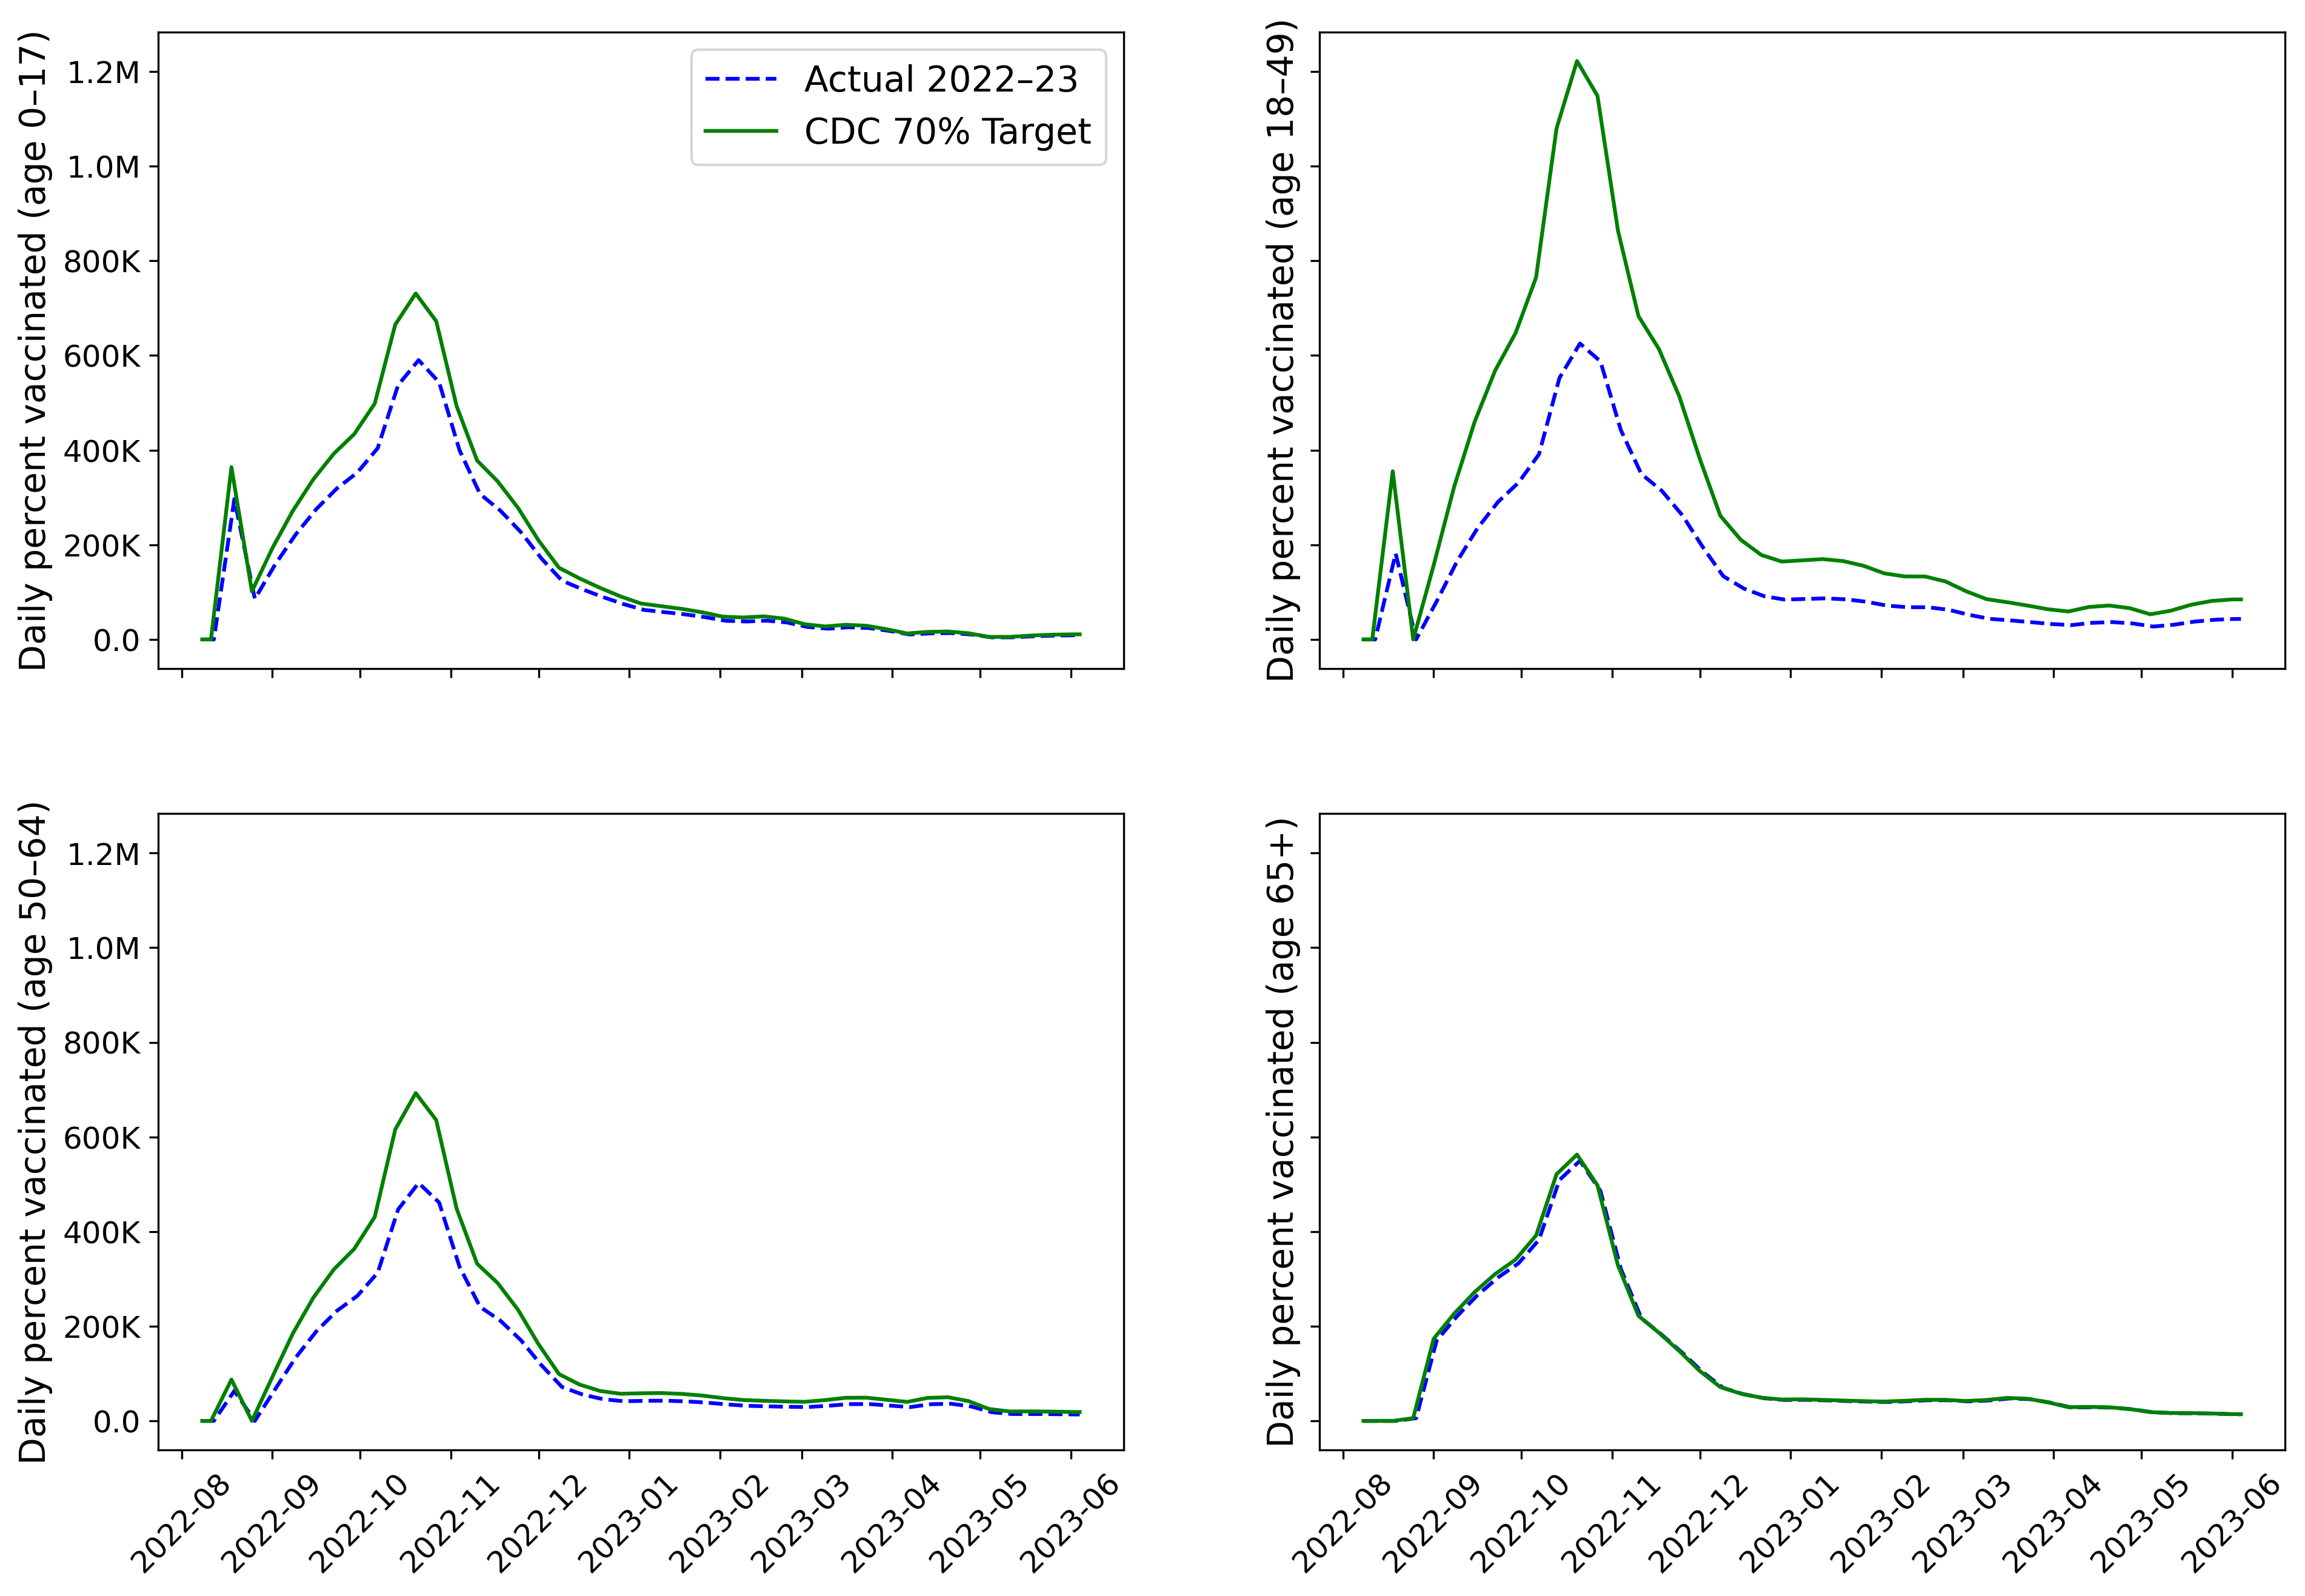

In [90]:
import numpy as np
import matplotlib.pyplot as plt
import datetime
from matplotlib.ticker import FuncFormatter

# Define age group labels
age_groups = ['0-17', '18-49', '50-64', '65+']
age_group_labels = [
    'Daily percent vaccinated (age 0–17)',
    'Daily percent vaccinated (age 18–49)',
    'Daily percent vaccinated (age 50–64)',
    'Daily percent vaccinated (age 65+)'
]

# Example population sizes for percent conversion (replace with actuals)
population_sizes = [
    1_000_000,  # age 0-17
    2_000_000,  # age 18-49
    1_500_000,  # age 50-64
    1_200_000   # age 65+
]

# Combine 0–4, 5–12, 13–17 into one group
vacc_1_combined = np.vstack([vacc_1[0, :301], vacc_1[1, :301], vacc_1[2, :301]]).sum(axis=0)
vacc_2_combined = np.vstack([vacc_2[0, :301], vacc_2[1, :301], vacc_2[2, :301]]).sum(axis=0)

# Create new grouped data arrays
vacc_1_grouped = [vacc_1_combined, vacc_1[3, :301], vacc_1[4, :301], vacc_1[5, :301]]
vacc_2_grouped = [vacc_2_combined, vacc_2[3, :301], vacc_2[4, :301], vacc_2[5, :301]]

# Create daily percent vaccinated
vacc_1_percent = [100 * group / pop for group, pop in zip(vacc_1_grouped, population_sizes)]
vacc_2_percent = [100 * group / pop for group, pop in zip(vacc_2_grouped, population_sizes)]

# Create x-axis as daily dates starting from August 8
start_date = datetime.date(2022, 8, 8)
dates = [start_date + datetime.timedelta(days=i) for i in range(301)]

# Formatter to show large y-axis ticks (e.g., 200K, 400K)
def human_format(x, _):
    if x >= 1_000_000:
        return f'{x/1_000_000:.1f}M'
    elif x >= 1_000:
        return f'{int(x/1_000)}K'
    else:
        return str(x)

# Plotting
fig, axs = plt.subplots(2, 2, figsize=(14, 10), sharex=True, sharey=True, dpi=300)

for i in range(4):
    ax = axs[i // 2, i % 2]
    ax.plot(dates, vacc_1_grouped[i], label='Actual 2022–23', color='blue', linestyle='--')
    ax.plot(dates, vacc_2_grouped[i], label='CDC 70% Target', color='green', linestyle='-')
    #ax.set_xlabel('Days since Aug 8, 2022', fontsize=14)
    ax.set_ylabel(age_group_labels[i], fontsize=14)
    ax.tick_params(axis='both', labelsize=12)
    ax.tick_params(axis='x', rotation=45)
    ax.yaxis.set_major_formatter(FuncFormatter(human_format))
    if i == 0:
        ax.legend(fontsize=14)
    else:
        ax.legend().set_visible(False)

plt.tight_layout()
plt.show()


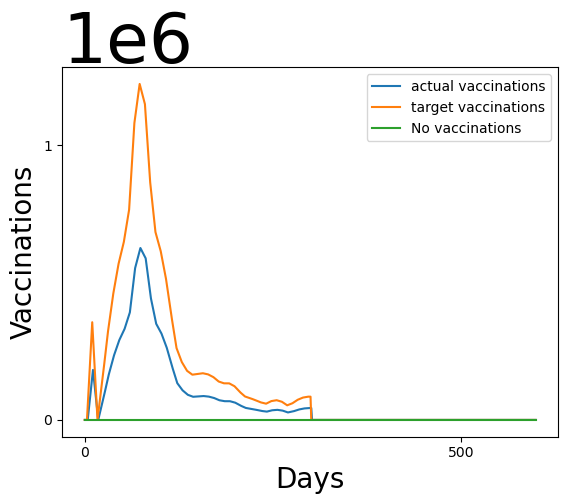

In [91]:
import matplotlib.pyplot as plt

plt.plot(vacc_1[3,:], label='actual vaccinations')
plt.plot(vacc_2[3,:], label='target vaccinations')
plt.plot(vacc_3[3,:],label='No vaccinations')

# set the plot title, x-label, y-label, and legend
#plt.title('65+ vaccination scenario')
plt.xlabel('Days',fontsize=20)
plt.ylabel('Vaccinations', fontsize=20)
plt.legend(fontsize=10)
plt.yticks(fontsize=10)
plt.xticks(fontsize=10)
# show the plot
plt.show()

In [92]:
def cum_to_active(Ic):
    Iac = np.zeros([len(Ic), ])
    for i in range(len(Ic)-1):
        Iac[i] = Ic[i+1] - Ic[i]
        
    Iac[len(Ic)-1] = Iac[len(Ic)-2]
    return Iac

In [93]:
def computerate(i, CWW, aW, I, Ni):
    rate = 0
    for n in range(6):
        rate += aW*CWW[i,n]*(np.sum(max(0, I[n]))/Ni[n])
        #return 1
    return rate

I = np.ones([6, ])

In [94]:
hosp_data = np.genfromtxt('files/hosp2.csv', delimiter=';')

In [95]:
US2 = pd.read_csv('fit_data/' + y + '.csv')
US3 = pd.read_csv('fit_data/' + y + '2.csv')



In [96]:

hosps = US2['hosp'].to_numpy() # we have 213 enteries so 213-7 = 206. #till March 08, 2023 
print(len(hosps))

hosp_avg = np.zeros([206, ])
for i in range(206):
    hosp_avg[i] = np.mean(hosps[i:i+7])


213


In [97]:

hosps2 = US3['hosp'].to_numpy() # we have 213 enteries so 213-7 = 206. #till March 08, 2023 
print(len(hosps2))

hosp_avg2 = np.zeros([263, ])
for i in range(263):
    hosp_avg2[i] = np.mean(hosps2[i:i+7])


270


In [98]:
CM_all = np.genfromtxt('files/CMs/CM_All.txt')
CM_s = np.genfromtxt('files/CMs/CM_s.txt')
CM_w = np.genfromtxt('files/CMs/CM_w.txt')

In [99]:
cal = pd.read_csv('data/calend_new.csv')
school = cal['school'].to_numpy()
work = cal['work'].to_numpy()

In [100]:
vacc_cov = pd.read_csv('cumulative_dose.csv') # This csv file is same as the cumulative_dose_new.csv file in script folder generated using code in vaxx_new.ipynb

In [101]:
Seed = np.zeros([500, 1])

In [102]:
def get_sero(state, df2, age):
    df = df2[df2['state'] == state]
    a = df[age]
    if df.size == 0:
        return float('nan')
    else:
        return a.squeeze()

In [103]:
facc = 0.144
IHR = [facc*0.22, facc*0.07,facc*0.025, facc*0.017, facc*0.055, facc*0.4]
IRec = [1- facc*0.22, 1- facc*0.07, 1-facc*0.025, 1-facc*0.017, 1-facc*0.055, 1-facc*0.4]

np.sum(np.array(data_dem)*np.array(IHR))/N

0.01566565235665134

In [104]:
IHR

[0.03168, 0.01008, 0.0036, 0.002448, 0.00792, 0.0576]

In [105]:
faccc = 0.635
HDR = [faccc*0.13, faccc*0.04,faccc*0.04, faccc*0.054, faccc*0.13, faccc*0.316]
HDRec = [1- faccc*0.13, 1- faccc*0.04, 1-faccc*0.04, 1-faccc*0.054, 1-faccc*0.13, 1-faccc*0.316]

np.sum(np.array(data_dem)*np.array(HDR))/N

0.07351281245947526

In [106]:
fac2 = sum(sum(vacc_1[:,0:54]))/sum(sum(vacc_1[:,:]))

M2_0 = [0.01*get_sero(state, vacc_cov, '0_4')*fac2, 0.01*get_sero(state, vacc_cov, '5_12')*fac2, 0.01*get_sero(state, vacc_cov, '13_17')*fac2, 0.01*get_sero(state, vacc_cov, '18_49')*fac2, 0.01*get_sero(state, vacc_cov, '50_64')*fac2, 0.01*get_sero(state, vacc_cov, '65+')*fac2]
np.sum(np.array(data_dem)*np.array(M2_0))/N
#M2_0

0.09606354984219526

In [107]:
g_E = 1/(2)
g_hosp = 1/6
q = 2/3
Ni = data_dem

g_Recovery = 1/4
g_em = 1/12
g_inf = 1/10
KM = 100

g_hosp = 1/5

In [108]:
#pd.read_csv('FluSurveillance_Custom_Download_Data.csv')

In [109]:
flu_age = pd.read_csv('FluSurveillance_Custom_Download_Data.csv', usecols = ['MMWR-YEAR','MMWR-WEEK','AGE CATEGORY','CUMULATIVE RATE','WEEKLY RATE '])
flu_age_04=flu_age[flu_age['AGE CATEGORY'] == '0-4 yr']
flu_age_511=flu_age[flu_age['AGE CATEGORY'] == '5-11  yr']
flu_age_1217=flu_age[flu_age['AGE CATEGORY'] == '12-17 yr']
flu_age_1849=flu_age[flu_age['AGE CATEGORY'] == '18-49 yr']
flu_age_5064=flu_age[flu_age['AGE CATEGORY'] == '50-64 yr']
flu_age_65=flu_age[flu_age['AGE CATEGORY'] == '65+ yr']

flu_age_04_array=flu_age_04['CUMULATIVE RATE'].to_numpy()
flu_age_511_array=flu_age_511['CUMULATIVE RATE'].to_numpy()
flu_age_1217_array=flu_age_1217['CUMULATIVE RATE'].to_numpy()
flu_age_1849_array=flu_age_1849['CUMULATIVE RATE'].to_numpy()
flu_age_5064_array=flu_age_5064['CUMULATIVE RATE'].to_numpy()
flu_age_65_array=flu_age_65['CUMULATIVE RATE'].to_numpy()

In [110]:
total_hosp=(flu_age_04_array[-1]*data_dem[0]+flu_age_511_array[-1]*data_dem[1]+flu_age_1217_array[-1]*data_dem[2]+flu_age_1849_array[-1]*data_dem[3]+flu_age_5064_array[-1]*data_dem[4]+flu_age_65_array[-1]*data_dem[5])/100000
hosp_ratio=np.zeros([6])
hosp_ratio[0]=(flu_age_04_array[-1]*data_dem[0]/100000)/total_hosp
hosp_ratio[1]=(flu_age_511_array[-1]*data_dem[1]/100000)/total_hosp
hosp_ratio[2]=(flu_age_1217_array[-1]*data_dem[2]/100000)/total_hosp
hosp_ratio[3]=(flu_age_1849_array[-1]*data_dem[3]/100000)/total_hosp
hosp_ratio[4]=(flu_age_5064_array[-1]*data_dem[4]/100000)/total_hosp
hosp_ratio[5]=(flu_age_65_array[-1]*data_dem[5]/100000)/total_hosp
hosp_ratio

array([0.08947592, 0.05968022, 0.01758435, 0.1649929 , 0.20339859,
       0.46486801])

In [111]:
def set_imm(val):  #ask significance of this # mostly immunity value related
    for i in range(1000):
        fac = 1 + i*0.001
        MM_0 = [fac*hosp_ratio[0], fac*hosp_ratio[1],fac*hosp_ratio[2], fac*0.5*hosp_ratio[3], fac*0.5*hosp_ratio[4], fac*0.5*hosp_ratio[5]]
        xx = np.sum(np.array(data_dem)*np.array(MM_0))/N
        if (xx >=  val):
            break
    return MM_0

In [112]:
init_imm=0.35
M3_0= set_imm(init_imm)


M3_0

[0.17886236748931814,
 0.1193007552881606,
 0.03515111539740447,
 0.16491040748609548,
 0.20329689376089566,
 0.46463557966556734]

In [113]:
np.mean(M3_0)

0.19435951984790698

In [114]:
All_state_hum = pd.read_csv('state_climate_data (1).csv') 


#extract
each_state_hum = All_state_hum.groupby('state')['spec.hum'].apply(lambda x: np.array(x)).reset_index()


## the state that is initially given will be called here
hum_state = each_state_hum.loc[each_state_hum['state'] == state, 'spec.hum'].values[0]
Hum_365=hum_state

In [115]:
from statistics import mean 
def cal_hum(length, start_date, magnitude):
    hum_final=np.zeros([length, 1])
    for i in range(len(hum_final)):
        j=(i+start_date)%365
        hum_final[i]=1+((mean(Hum_365)-Hum_365[j])/(max(Hum_365)-mean(Hum_365)))*magnitude

    return hum_final

In [116]:
vacc_1=vacc_1[:,54:]
vacc_2=vacc_2[:,54:]
vacc_3=vacc_3[:,54:]
hosp_avg2=hosp_avg2[54:]##US
school=school[54:]
work=work[54:]

In [117]:
len(hosp_avg2)

209

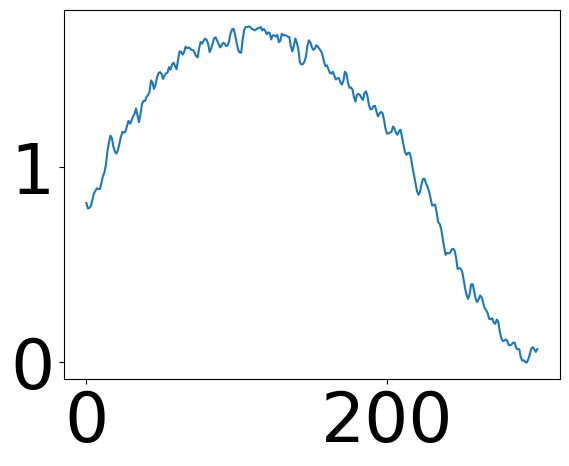

In [118]:
cc=cal_hum(365, 0, 1)
zz2=cal_hum(301, 273, 1)
plt.plot(zz2)

In [171]:
def sim_hospA(x, x0, x1, x2, x3,mag,ratio1,ratio2,ratio3):
    sc1 = "normal"
    sc2 = "baseline"
    Nd = 216  # earlier it was 102 as 102 enteries in fitdata set, now we have 213 eneteries
    dt = 1 #time step
    t = 0  #number of steps
    bita = x0/N
    S = np.zeros([6])
    E = np.zeros([6, ])
    I = np.zeros([6, ])
    Ir = np.zeros([6, ])
    H = np.zeros([6, ])
    Hr = np.zeros([6, ])
    R = np.zeros([6, ])
    
    S1 = np.zeros([6])
    E1 = np.zeros([6, ])
    I1 = np.zeros([6, ])
    Ir1 = np.zeros([6, ])
    H1 = np.zeros([6, ])
    Hr1 = np.zeros([6, ])
    R1 = np.zeros([6, ])
    M3_0 = set_imm(init_imm)    
    D = np.zeros([6, ])
    M = np.array(M3_0)
    M1 = np.zeros([6, ])
    Mv = np.array(M_0)
  
    sigma = 0.000

    def dW(delta_t):
        return np.random.normal(loc=0.0, scale=np.sqrt(delta_t))
    
    def g(y, sigma):
        return sigma*(y)
    
    
    case_c = np.zeros([6, ])
    hosp_c = np.zeros([6, ])
   
    S1_new = np.zeros([6, ])
    E1_new = np.zeros([6, ])
    I1_new = np.zeros([6, ])
    Ir1_new = np.zeros([6, ])
    H1_new = np.zeros([6, ])
    Hr1_new = np.zeros([6, ])
    R1_new = np.zeros([6, ])
    D_new = np.zeros([6, ])  
    
    S_new = np.zeros([6, ])
    E_new = np.zeros([6, ])
    I_new = np.zeros([6, ])
    Ir_new = np.zeros([6, ])
    H_new = np.zeros([6, ])
    Hr_new = np.zeros([6, ])
    R_new = np.zeros([6, ])

    D_age = np.zeros([6, ])
    
    M_new = np.array(M3_0)
    M1_new = np.zeros([6, ])
    Mv_new = np.zeros([6, ])
        
    case_c_new = np.zeros([6, ])
    hosp_c_new = np.zeros([6, ])
    
    Ic_ov = np.zeros([Nd, ])
    hosp_cc = np.zeros([Nd, ])
    Ia_ov = np.zeros([Nd, ])
    cum = np.zeros([Nd, ])
    D_ov = np.zeros([Nd, ])
    symp_r = np.zeros([Nd, ])

    S_ov = np.zeros([Nd, ])
    E_ov = np.zeros([Nd, ])
    P_ov = np.zeros([Nd, ])
    I_ov = np.zeros([Nd, ])
    H_ov = np.zeros([Nd, ])
    R_ov = np.zeros([Nd, ])
    M_ov = np.zeros([Nd, 6])
    M1_ov = np.zeros([Nd, 6])
    Mv_ov = np.zeros([Nd, 6])
    symp_rr = np.zeros([Nd, 6])
    M_ovv = np.zeros([Nd, ])
    M1_ovv = np.zeros([Nd, 6])
    Mv_ovv = np.zeros([Nd, ])
    Mv_ovv19 = np.zeros([Nd, 6])
    prot = np.zeros([Nd, 6])
    
    bita_s = np.zeros([Nd, ])    
    count = 0

    
    
    E0 = [ratio1*x2,ratio2*x2,ratio2*x2,ratio2*x2,ratio2*x2,ratio3*x2]
    I_0 = [ratio1*x1*IHR[0],ratio2*x1*IHR[1],ratio2*x1*IHR[2],ratio2*x1*IHR[3],ratio2*x1*IHR[4],ratio3*x1*IHR[5]]
    Ir_0 = [ratio1*x1*IRec[0],ratio2*x1*IRec[1],ratio2*x1*IRec[2],ratio2*x1*IRec[3],ratio2*x1*IRec[4],ratio3*x1*IRec[5]]
    H0 = [hosp_ratio[0]*x3*HDR[0],hosp_ratio[1]*x3*HDR[1],hosp_ratio[2]*x3*HDR[2],hosp_ratio[3]*x3*HDR[3],hosp_ratio[4]*x3*HDR[4],hosp_ratio[5]*x3*HDR[5]]
    Hr0 = [hosp_ratio[0]*x3*HDRec[0],hosp_ratio[1]*x3*HDRec[1],hosp_ratio[2]*x3*HDRec[2],hosp_ratio[3]*x3*HDRec[3],hosp_ratio[4]*x3*HDRec[4],hosp_ratio[5]*x3*HDRec[5]]
    
    w2 = np.log(2)/(18*60)
    w1 = np.log(2)/(3*60)
    ww = 1/(10)
    
    D0 = [0/6  for n in Ni]
    S10 = [Ni[n] - E0[n] - I_0[n] - Ir_0[n] - H0[n] - Hr0[n] - D0[n] for n in range(6)]
    R0 = [0 for n in Ni]  
    S = np.asarray(S10)
    E = np.asarray(E0)
    I = np.asarray(I_0); Ir=np.asarray(Ir_0); H = np.asarray(H0);Hr = np.asarray(Hr0); D = np.asarray(D0); R = np.asarray(R0); M = np.asarray(M3_0)
    if (sc2 == "baseline"):
        Mv = np.asarray(M2_0)
    if (sc2 == "none"):
        Mv = np.zeros([6, ])
    for tt in range(int(Nd/dt)):
        zx = 1
        
        bita = (mag*(zz2[count]-1)+1)*(x0/N)              
        CM = CM_all
        if (school[count] == 0):
            CM = CM - CM_s

        if (work[count] == 0):
            CM = CM - CM_w #- CM_s
                
        for i in range(6):      
            S_g  =  g(S[i],sigma)*dW(dt)
            E_g  =  g(E[i],sigma)*dW(dt)
            I_g  =  g(I[i],sigma)*dW(dt)
            H_g = g(H[i],sigma)*dW(dt)              
            R_g = g(R[i],sigma)*dW(dt)  

            S1_g  =  g(S1[i],sigma)*dW(dt)
            E1_g  =  g(E1[i],sigma)*dW(dt)
            I1_g  =  g(I1[i],sigma)*dW(dt)
            H1_g = g(H1[i],sigma)*dW(dt)              
            R1_g = g(R1[i],sigma)*dW(dt) 

        
        
        K_o = [4, 4, 4, 1.5, 1.5, 1.5]# natural imm against flu inf
        K1_o = [4, 4, 4, 1.5, 1.5, 1.5]# natural imm against flu inf
        Kh_o = [4, 4, 4, 0.5, 0.5, 0.5]# natural imm against flu hosp
        K1h_o = [4, 4, 4, 0.5, 0.5, 0.5] # natural imm against flu hosp
            
        '''
        if (sc1 == "normal"):
            #Kv_o = [1.5, 1.5, 1.5, 1.5, 1.5, 1.5]
            Kv_o = [1.08, 1.08, 1.08, 0.563, 0.563, 0.316]#vacc eff against flu infection
            Kvh_o = [2.125, 2.125, 2.125, 1.04, 1.04, 0.54]# vacc eff against flu hosp
        if (sc1 == "aginstinf"):
            #Kv_o = [0.43, 0.43, 0.43, 0.43, 0.43, 0.43]
            Kv_o = [1.08, 1.08, 1.08, 0.563, 0.563, 0.316]#vacc eff against flu infection
            Kvh_o = [0, 0, 0, 0, 0, 0]# vacc eff against flu hosp
        if (sc1 == "aginsthosp"):
            #Kv_o = [0.43, 0.43, 0.43, 0.43, 0.43, 0.43]
            Kv_o = [0, 0, 0, 0, 0, 0]#vacc eff against flu infection
            Kvh_o = [2.125, 2.125, 2.125, 1.04, 1.04, 0.54]# vacc eff against flu hosp
        '''
        
        '''
        ####our metanalysis proposal 
        if (sc1 == "normal"):
            #Kv_o = [1.5, 1.5, 1.5, 1.5, 1.5, 1.5]
            Kv_o = [0.7544, 0.7544, 0.7544, 0.5385, 0.5385, 0.3158]#vacc eff against flu infection
            Kvh_o = [0.7857, 0.7857, 0.7857, 0.2346,0.2346,0.04]# vacc eff against flu hosp
        if (sc1 == "aginstinf"):
            #Kv_o = [0.43, 0.43, 0.43, 0.43, 0.43, 0.43]
            Kv_o = [0.7544, 0.7544, 0.7544, 0.5385, 0.5385, 0.3158]#vacc eff against flu infection
            Kvh_o = [0, 0, 0, 0, 0, 0]# vacc eff against flu hosp
        if (sc1 == "aginsthosp"):
            #Kv_o = [0.43, 0.43, 0.43, 0.43, 0.43, 0.43]
            Kv_o = [0, 0, 0, 0, 0, 0]#vacc eff against flu infection
            Kvh_o = [0.7857, 0.7857, 0.7857, 0.2346,0.2346,0.04]# vacc eff against flu hosp
        '''  
        ###rebecca A:
        '''
        if (sc1 == "normal"):
            #Kv_o = [1.5, 1.5, 1.5, 1.5, 1.5, 1.5]
            Kv_o = [0.3154, 0.3154, 0.3154, 0.25, 0.25, 0.1765]#vacc eff against flu infection
            Kvh_o = [1.381, 1.381, 1.381, 0.5156,0.5156,0.1628]# vacc eff against flu hosp
        if (sc1 == "aginstinf"):
            #Kv_o = [0.43, 0.43, 0.43, 0.43, 0.43, 0.43]
            Kv_o = [0.3154, 0.3154, 0.3154, 0.25, 0.25, 0.1765]#vacc eff against flu infection
            Kvh_o = [0, 0, 0, 0, 0, 0]# vacc eff against flu hosp
        if (sc1 == "aginsthosp"):
            #Kv_o = [0.43, 0.43, 0.43, 0.43, 0.43, 0.43]
            Kv_o = [0, 0, 0, 0, 0, 0]#vacc eff against flu infection
            Kvh_o = [1.381, 1.381, 1.381, 0.5156,0.5156,0.1628]# vacc eff against flu hosp
        
        '''
        ###rebecca B:
        '''
        if (sc1 == "normal"):
            #Kv_o = [1.5, 1.5, 1.5, 1.5, 1.5, 1.5]
            Kv_o = [0.4493, 0.4493, 0.4493, 0.4493, 0.4493, 0.4493]#vacc eff against flu infection
            Kvh_o = [1.127, 1.127, 1.127, 0.2987,0.2987,0]# vacc eff against flu hosp
        if (sc1 == "aginstinf"):
            #Kv_o = [0.43, 0.43, 0.43, 0.43, 0.43, 0.43]
            Kv_o = [0.4493, 0.4493, 0.4493, 0.4493, 0.4493, 0.4493]#vacc eff against flu infection
            Kvh_o = [0, 0, 0, 0, 0, 0]# vacc eff against flu hosp
        if (sc1 == "aginsthosp"):
            #Kv_o = [0.43, 0.43, 0.43, 0.43, 0.43, 0.43]
            Kv_o = [0, 0, 0, 0, 0, 0]#vacc eff against flu infection
            Kvh_o = [1.127, 1.127, 1.127, 0.2987,0.2987,0]# vacc eff against flu hosp        
        '''
        '''
        #### sensitivity analysis
        ## low scenario 
        if (sc1 == "normal"):
            #Kv_o = [1.5, 1.5, 1.5, 1.5, 1.5, 1.5]
            Kv_o = [0.3889, 0.3889, 0.3889, 0.1628, 0.1628, 0]#vacc eff against flu infection
            Kvh_o = [0.3333, 0.3333, 0.3333, 0.2346,0.2346,0.1111]# vacc eff against flu hosp
        if (sc1 == "aginstinf"):
            #Kv_o = [0.43, 0.43, 0.43, 0.43, 0.43, 0.43]
            Kv_o = [0.3889,0.3889, 0.3889, 0.1628, 0.1628, 0]#vacc eff against flu infection
            Kvh_o = [0, 0, 0, 0, 0, 0]# vacc eff against flu hosp
        if (sc1 == "aginsthosp"):
            #Kv_o = [0.43, 0.43, 0.43, 0.43, 0.43, 0.43]
            Kv_o = [0, 0, 0, 0, 0, 0]#vacc eff against flu infection
            Kvh_o = [0.3333, 0.3333, 0.3333, 0.2346,0.2346,0.1111]# vacc eff against flu hosp
        
    
        '''
        '''
        ###high scenario 
        if (sc1 == "normal"):
            #Kv_o = [1.5, 1.5, 1.5, 1.5, 1.5, 1.5]
            Kv_o = [1.2222, 1.2222, 1.2222, 1.0408, 1.0408, 0.1818]#vacc eff against flu infection
            Kvh_o = [1.3809, 1.3809, 1.3809, 0.2195,0.2195,0]# vacc eff against flu hosp
        if (sc1 == "aginstinf"):
            #Kv_o = [0.43, 0.43, 0.43, 0.43, 0.43, 0.43]
            Kv_o = [1.2222, 1.2222, 1.2222, 1.0408, 1.0408, 0.1818]#vacc eff against flu infection
            Kvh_o = [0, 0, 0, 0, 0, 0]# vacc eff against flu hosp
        if (sc1 == "aginsthosp"):
            #Kv_o = [0.43, 0.43, 0.43, 0.43, 0.43, 0.43]
            Kv_o = [0, 0, 0, 0, 0, 0]#vacc eff against flu infection
            Kvh_o = [1.3809, 1.3809, 1.3809, 0.2195,0.2195,0]# vacc eff against flu hosp
        
        
        ### NEW VE (METABIN AND VISION)
        '''
        if (sc1 == "normal"):
            #Kv_o = [1.5, 1.5, 1.5, 1.5, 1.5, 1.5]
            Kv_o = [0.7544, 0.7544, 0.7544, 0.2658, 0.2658, 0]#vacc eff against flu infection
            Kvh_o = [0.7857, 0.7857, 0.7857, 0.0309,0.0309,0.6949]# vacc eff against flu hosp
        if (sc1 == "aginstinf"):
            #Kv_o = [0.43, 0.43, 0.43, 0.43, 0.43, 0.43]
            Kv_o = [0.7544, 0.7544, 0.7544, 0.2658, 0.2658, 0]#vacc eff against flu infection
            Kvh_o = [0, 0, 0, 0, 0, 0]# vacc eff against flu hosp
        if (sc1 == "aginsthosp"):
            #Kv_o = [0.43, 0.43, 0.43, 0.43, 0.43, 0.43]
            Kv_o = [0, 0, 0, 0, 0, 0]#vacc eff against flu infection
            Kvh_o = [0.7857, 0.7857, 0.7857, 0.0309,0.0309,0.6949]# vacc eff against flu hospp
        

        for i in range(6):   
                
            prot_inf = K_o[i]*M[i] + K1_o[i]*M1[i] + Kv_o[i]*Mv[i]
            prot_inf1 = K_o[i]*M[i] + K1_o[i]*M1[i] + Kv_o[i]*Mv[i]
            prot_hosp = Kh_o[i]*M[i] + K1h_o[i]*M1[i] + Kvh_o[i]*Mv[i]# protec against hosp 
            prot_hosp1 = Kh_o[i]*M[i] + K1h_o[i]*M1[i] + Kvh_o[i]*Mv[i]# protec against hosp 
            #if (sc2 == "pesImm"):
            #    prot_inf1 = (1-0.5)*K_o[i]*M[i] + K1_o[i]*M1[i] + Kv_o[i]*Mv[i]
            #else:
             #   prot_inf1 = (1-0)*K_o[i]*M[i] + K1_o[i]*M1[i] + Kv_o[i]*Mv[i]

            S_new[i] = S[i] + dt*(-(bita/(1 + prot_inf))*computerate(i, CM, 1, I+Ir, Ni)*S[i] - (bita/(1 + prot_inf1))*computerate(i, CM, 1, I1+Ir1, Ni)*S[i] + ww*R[i] + ww*R1[i]) + S_g
            E_new[i] = E[i] + dt*((bita/(1 + prot_inf))*computerate(i, CM, 1, I+Ir , Ni)*S[i] - g_E*E[i]*((IRec[i]+prot_hosp)/(1 + prot_hosp))-g_E*E[i]*(IHR[i]/(1 + prot_hosp)))
                
            case_c_new[i] = case_c[i] + dt*(g_E*E[i] + g_E*E1[i]) 
            Ir_new[i]=Ir[i]+dt*(g_E*E[i]*((IRec[i]+prot_hosp)/(1 + prot_hosp))-g_Recovery*Ir[i])
            I_new[i] = I[i] + dt*(g_E*E[i]*(IHR[i]/(1 + prot_hosp)) - g_Recovery*I[i]) + I_g
            hosp_c_new[i] = hosp_c[i] + dt*(g_Recovery*I[i] + g_Recovery*I1[i])
            
            Hr_new[i] = Hr[i] + dt*(g_Recovery*I[i]*HDRec[i]-g_hosp*Hr[i])
            H_new[i] = H[i] + dt*(g_Recovery*I[i]*HDR[i]  - g_hosp*H[i]) + H_g    
            D_new[i] = D[i] + dt*(g_hosp*H[i] + g_hosp*H1[i]) 
            R_new[i] = R[i] + dt*(g_hosp*Hr[i] + g_Recovery*Ir[i] - ww*R[i]) + R_g
                
            E1_new[i] = E1[i] + dt*((bita/(1 + prot_inf1))*computerate(i, CM, 1, I1+Ir1, Ni)*S[i] - g_E*E1[i])  + E1_g
            Ir1_new[i]=Ir1[i]+dt*(g_E*E1[i]*((IRec[i]+prot_hosp1)/(1 + prot_hosp1))-g_Recovery*Ir1[i])
            I1_new[i] = I1[i] + dt*(g_E*E1[i]*(IHR[i]/(1 + prot_hosp1)) - g_Recovery*I1[i]) + I1_g
            # change seed to 0 will have no difference in pes and opt scenarios 
            #I1_new[i] = I1[i] + dt*(0*(data_dem[i]/N) + g_E*E1[i]  - g_Recovery*(IHR[i]/(1 + prot_inf1))*I1[i] - g_Recovery*IRec[i]*I1[i]) + I1_g

            Hr1_new[i] = Hr1[i] + dt*(g_Recovery*I1[i]*HDRec[i]-g_hosp*Hr1[i])
            H1_new[i] = H1[i] + dt*(g_Recovery*I1[i]*HDR[i]  - g_hosp*H1[i]) + H_g       
            R1_new[i] = R1[i] + dt*(g_hosp*Hr1[i] + g_Recovery*Ir1[i] - ww*R1[i]) 
                 #hosp_c[i] = H_new[i] + H1_new[i]
                # vaccc(tt, V, dt, Ni, time1, time2, time3, time4, time5):
                     
                
            if (count <= 480):
                if (sc2 == "baseline"):   
                    vacc_ref = vacc_1
                if (sc2 == "target"):   
                    vacc_ref = vacc_2
                if (sc2 == "none"):   
                    vacc_ref = vacc_3
                Mv_new[i] = Mv[i] + dt*(- w1*Mv[i] + k1[i]*vacc_ref[i, count])
                M1_new[i] = M1[i] + dt*(-w2*M1[i] + k3[i]*ww*R1[i]/(prot_inf1))
                M_new[i] = M[i] + dt*(-w2*M[i] + k3[i]*ww*R[i]/(prot_inf))
                prot[count,i] = (1/(1+prot_inf))
                            
                            
        S = S_new; E = E_new; I = I_new; case_c = case_c_new; hosp_c = hosp_c_new; H = H_new; D = D_new; R = R_new; M = M_new; M1 = M1_new; Mv = Mv_new;
        S1 = S1_new; E1 = E1_new; I1 = I1_new; H1 = H1_new; R1 = R1_new; Ir=Ir_new; Hr=Hr_new; Ir1=Ir1_new; Hr1=Hr1_new
        if(tt % int(1/dt) == 0):
            #bita_s[count] = np.sum(np.array(K1_b)*np.array(M22)) + np.sum(np.array(K1_v)*np.array(M)) + np.sum(np.array(K1_o12)*np.array(MX))
           
            for i in range(6):
                Mv_ovv19[count, i] = Mv[i]
                #prot[count,i] = K_o[i]*M[i] + K1_o[i]*M1[i] + Kv_o[i]*Mv[i]
               
            Ic_ov[count] = np.sum(case_c)
            D_ov[count] = np.sum(D)
            S_ov[count] = np.sum(S)
            cum[count] = np.sum(case_c)
            hosp_cc[count] = np.sum(hosp_c)
            
            #symp_r[count] = np.sum(a_bar)/(6*g_E)

            M_ovv[count] = np.sum(np.array(data_dem)*np.array(M))/N
            M1_ovv[count] = np.sum(np.array(data_dem)*np.array(M1))/N
            Mv_ovv[count] = np.sum(np.array(data_dem)*np.array(Mv))/N

            
            E_ov[count] = np.sum(E)
            I_ov[count] = np.sum(I + H)
            H_ov[count] = np.sum(H)
            R_ov[count] = np.sum(R)
            count = count+1
 
    
    D_age = np.sum(D)      
    D2_ova = cum_to_active(Ic_ov)
    H_ova = cum_to_active(hosp_cc)
    D3_ova = cum_to_active(D_ov)
    I_ov_avg = np.zeros([Nd-7, ])
    D_ov_avg = np.zeros([Nd-7, ])
    H_ov_avg = np.zeros([Nd-7, ])
    for i in range(Nd-7):
        
        I_ov_avg[i] = max(np.mean(D2_ova[i:i+7]), 0)
        D_ov_avg[i] = max(np.mean(D3_ova[i:i+7]), 0)
        H_ov_avg[i] = max(np.mean(H_ova[i:i+7]), 0)
    return H_ov_avg

In [172]:
def simulation_st1(x):
    Nd = 216# earlier it was 357 here, now I am taking 301 
    dt = 1 #time step
    t = 0  #number of steps
    bita = x0/N
    S = np.zeros([6])
    E = np.zeros([6, ])
    I = np.zeros([6, ])
    Ir = np.zeros([6, ])
    H = np.zeros([6, ])
    Hr = np.zeros([6, ])
    R = np.zeros([6, ])
    
    S1 = np.zeros([6])
    E1 = np.zeros([6, ])
    I1 = np.zeros([6, ])
    Ir1 = np.zeros([6, ])
    H1 = np.zeros([6, ])
    Hr1 = np.zeros([6, ])
    R1 = np.zeros([6, ])
    M3_0 = set_imm(init_imm)    
    D = np.zeros([6, ])
    M = np.array(M3_0)
    M1 = np.zeros([6, ])
    Mv = np.array(M_0)
  
    sigma = 0.000

    def dW(delta_t):
        return np.random.normal(loc=0.0, scale=np.sqrt(delta_t))
    
    def g(y, sigma):
        return sigma*(y)
    
    
    case_c = np.zeros([6, ])
    hosp_c = np.zeros([6, ])
   
    S1_new = np.zeros([6, ])
    E1_new = np.zeros([6, ])
    I1_new = np.zeros([6, ])
    Ir1_new = np.zeros([6, ])
    H1_new = np.zeros([6, ])
    Hr1_new = np.zeros([6, ])
    R1_new = np.zeros([6, ])
    D_new = np.zeros([6, ])  
    
    S_new = np.zeros([6, ])
    E_new = np.zeros([6, ])
    I_new = np.zeros([6, ])
    Ir_new = np.zeros([6, ])
    H_new = np.zeros([6, ])
    Hr_new = np.zeros([6, ])
    R_new = np.zeros([6, ])

    D_age = np.zeros([6, ])
    
    M_new = np.array(M3_0)
    M1_new = np.zeros([6, ])
    Mv_new = np.zeros([6, ])
        
    case_c_new = np.zeros([6, ])
    hosp_c_new = np.zeros([6, ])
    
    Ic_ov = np.zeros([Nd, ])
    hosp_cc = np.zeros([Nd, ])
    hosp_cc = np.zeros([Nd, ])
    hosp_cc1 = np.zeros([Nd, ])
    hosp_cc2 = np.zeros([Nd, ])
    hosp_cc3 = np.zeros([Nd, ])
    hosp_cc4 = np.zeros([Nd, ])
    hosp_cc5 = np.zeros([Nd, ])
    hosp_cc0 = np.zeros([Nd, ])
    Ia_ov = np.zeros([Nd, ])
    cum = np.zeros([Nd, ])
    D_ov = np.zeros([Nd, ])
    symp_r = np.zeros([Nd, ])

    S_ov = np.zeros([Nd, ])
    E_ov = np.zeros([Nd, ])
    P_ov = np.zeros([Nd, ])
    I_ov = np.zeros([Nd, ])
    H_ov = np.zeros([Nd, ])
    R_ov = np.zeros([Nd, ])
    M_ov = np.zeros([Nd, 6])
    M1_ov = np.zeros([Nd, 6])
    Mv_ov = np.zeros([Nd, 6])
    symp_rr = np.zeros([Nd, 6])
    M_ovv = np.zeros([Nd, ])
    M1_ovv = np.zeros([Nd, 6])
    Mv_ovv = np.zeros([Nd, ])
    Mv_ovv19 = np.zeros([Nd, 6])
    prot = np.zeros([Nd, 6])
    
    bita_s = np.zeros([Nd, ])    
    count = 0

    
    
    E0 = [ratio1*x2,ratio2*x2,ratio2*x2,ratio2*x2,ratio2*x2,ratio3*x2]
    I_0 = [ratio1*x1*IHR[0],ratio2*x1*IHR[1],ratio2*x1*IHR[2],ratio2*x1*IHR[3],ratio2*x1*IHR[4],ratio3*x1*IHR[5]]
    Ir_0 = [ratio1*x1*IRec[0],ratio2*x1*IRec[1],ratio2*x1*IRec[2],ratio2*x1*IRec[3],ratio2*x1*IRec[4],ratio3*x1*IRec[5]]
    H0 = [hosp_ratio[0]*x3*HDR[0],hosp_ratio[1]*x3*HDR[1],hosp_ratio[2]*x3*HDR[2],hosp_ratio[3]*x3*HDR[3],hosp_ratio[4]*x3*HDR[4],hosp_ratio[5]*x3*HDR[5]]
    Hr0 = [hosp_ratio[0]*x3*HDRec[0],hosp_ratio[1]*x3*HDRec[1],hosp_ratio[2]*x3*HDRec[2],hosp_ratio[3]*x3*HDRec[3],hosp_ratio[4]*x3*HDRec[4],hosp_ratio[5]*x3*HDRec[5]]
    
    w2 = np.log(2)/(18*60)
    w1 = np.log(2)/(3*60)
    ww = 1/(10)
    
    D0 = [0/6  for n in Ni]
    S10 = [Ni[n] - E0[n] - I_0[n] - Ir_0[n] - H0[n] - Hr0[n] - D0[n] for n in range(6)]
    R0 = [0 for n in Ni]  
    S = np.asarray(S10)
    E = np.asarray(E0)
    I = np.asarray(I_0); Ir=np.asarray(Ir_0); H = np.asarray(H0);Hr = np.asarray(Hr0); D = np.asarray(D0); R = np.asarray(R0); M = np.asarray(M3_0)
    if (sc2 == "baseline"):
        Mv = np.asarray(M2_0)
    if (sc2 == "none"):
        Mv = np.zeros([6, ])
    for tt in range(int(Nd/dt)):
        zx = 1        
        bita = (mag*(zz2[count]-1)+1)*(x0/N)              
        CM = CM_all
        if (school[count] == 0):
            CM = CM - CM_s

        if (work[count] == 0):
            CM = CM - CM_w #- CM_s
                
        for i in range(6):      
            S_g  =  g(S[i],sigma)*dW(dt)
            E_g  =  g(E[i],sigma)*dW(dt)
            I_g  =  g(I[i],sigma)*dW(dt)
            H_g = g(H[i],sigma)*dW(dt)              
            R_g = g(R[i],sigma)*dW(dt)  

            S1_g  =  g(S1[i],sigma)*dW(dt)
            E1_g  =  g(E1[i],sigma)*dW(dt)
            I1_g  =  g(I1[i],sigma)*dW(dt)
            H1_g = g(H1[i],sigma)*dW(dt)              
            R1_g = g(R1[i],sigma)*dW(dt) 

        
        
        K_o = [4, 4, 4, 1.5, 1.5, 1.5]# natural imm against flu inf
        K1_o = [4, 4, 4, 1.5, 1.5, 1.5]# natural imm against flu inf
        Kh_o = [4, 4, 4, 0.5, 0.5, 0.5]# natural imm against flu hosp
        K1h_o = [4, 4, 4, 0.5, 0.5, 0.5] # natural imm against flu hosp
        '''
        if (sc1 == "normal"):
            #Kv_o = [1.5, 1.5, 1.5, 1.5, 1.5, 1.5]
            Kv_o = [1.08, 1.08, 1.08, 0.563, 0.563, 0.316]#vacc eff against flu infection
            Kvh_o = [2.125, 2.125, 2.125, 1.04, 1.04, 0.54]# vacc eff against flu hosp
        if (sc1 == "aginstinf"):
            #Kv_o = [0.43, 0.43, 0.43, 0.43, 0.43, 0.43]
            Kv_o = [1.08, 1.08, 1.08, 0.563, 0.563, 0.316]#vacc eff against flu infection
            Kvh_o = [0, 0, 0, 0, 0, 0]# vacc eff against flu hosp
        if (sc1 == "aginsthosp"):
            #Kv_o = [0.43, 0.43, 0.43, 0.43, 0.43, 0.43]
            Kv_o = [0, 0, 0, 0, 0, 0]#vacc eff against flu infection
            Kvh_o = [2.125, 2.125, 2.125, 1.04, 1.04, 0.54]# vacc eff against flu hosp
        '''
        
        '''
        ####our metanalysis proposal 
        if (sc1 == "normal"):
            #Kv_o = [1.5, 1.5, 1.5, 1.5, 1.5, 1.5]
            Kv_o = [0.7544, 0.7544, 0.7544, 0.5385, 0.5385, 0.3158]#vacc eff against flu infection
            Kvh_o = [0.7857, 0.7857, 0.7857, 0.2346,0.2346,0.04]# vacc eff against flu hosp
        if (sc1 == "aginstinf"):
            #Kv_o = [0.43, 0.43, 0.43, 0.43, 0.43, 0.43]
            Kv_o = [0.7544, 0.7544, 0.7544, 0.5385, 0.5385, 0.3158]#vacc eff against flu infection
            Kvh_o = [0, 0, 0, 0, 0, 0]# vacc eff against flu hosp
        if (sc1 == "aginsthosp"):
            #Kv_o = [0.43, 0.43, 0.43, 0.43, 0.43, 0.43]
            Kv_o = [0, 0, 0, 0, 0, 0]#vacc eff against flu infection
            Kvh_o = [0.7857, 0.7857, 0.7857, 0.2346,0.2346,0.04]# vacc eff against flu hosp
        '''  
        ###rebecca A:
        '''
        if (sc1 == "normal"):
            #Kv_o = [1.5, 1.5, 1.5, 1.5, 1.5, 1.5]
            Kv_o = [0.3154, 0.3154, 0.3154, 0.25, 0.25, 0.1765]#vacc eff against flu infection
            Kvh_o = [1.381, 1.381, 1.381, 0.5156,0.5156,0.1628]# vacc eff against flu hosp
        if (sc1 == "aginstinf"):
            #Kv_o = [0.43, 0.43, 0.43, 0.43, 0.43, 0.43]
            Kv_o = [0.3154, 0.3154, 0.3154, 0.25, 0.25, 0.1765]#vacc eff against flu infection
            Kvh_o = [0, 0, 0, 0, 0, 0]# vacc eff against flu hosp
        if (sc1 == "aginsthosp"):
            #Kv_o = [0.43, 0.43, 0.43, 0.43, 0.43, 0.43]
            Kv_o = [0, 0, 0, 0, 0, 0]#vacc eff against flu infection
            Kvh_o = [1.381, 1.381, 1.381, 0.5156,0.5156,0.1628]# vacc eff against flu hosp
        
        '''
        ###rebecca B:
        '''
        if (sc1 == "normal"):
            #Kv_o = [1.5, 1.5, 1.5, 1.5, 1.5, 1.5]
            Kv_o = [0.4493, 0.4493, 0.4493, 0.4493, 0.4493, 0.4493]#vacc eff against flu infection
            Kvh_o = [1.127, 1.127, 1.127, 0.2987,0.2987,0]# vacc eff against flu hosp
        if (sc1 == "aginstinf"):
            #Kv_o = [0.43, 0.43, 0.43, 0.43, 0.43, 0.43]
            Kv_o = [0.4493, 0.4493, 0.4493, 0.4493, 0.4493, 0.4493]#vacc eff against flu infection
            Kvh_o = [0, 0, 0, 0, 0, 0]# vacc eff against flu hosp
        if (sc1 == "aginsthosp"):
            #Kv_o = [0.43, 0.43, 0.43, 0.43, 0.43, 0.43]
            Kv_o = [0, 0, 0, 0, 0, 0]#vacc eff against flu infection
            Kvh_o = [1.127, 1.127, 1.127, 0.2987,0.2987,0]# vacc eff against flu hosp        
        '''
        '''
        #### sensitivity analysis
        ## low scenario 
        if (sc1 == "normal"):
            #Kv_o = [1.5, 1.5, 1.5, 1.5, 1.5, 1.5]
            Kv_o = [0.3889, 0.3889, 0.3889, 0.1628, 0.1628, 0]#vacc eff against flu infection
            Kvh_o = [0.3333, 0.3333, 0.3333, 0.2346,0.2346,0.1111]# vacc eff against flu hosp
        if (sc1 == "aginstinf"):
            #Kv_o = [0.43, 0.43, 0.43, 0.43, 0.43, 0.43]
            Kv_o = [0.3889,0.3889, 0.3889, 0.1628, 0.1628, 0]#vacc eff against flu infection
            Kvh_o = [0, 0, 0, 0, 0, 0]# vacc eff against flu hosp
        if (sc1 == "aginsthosp"):
            #Kv_o = [0.43, 0.43, 0.43, 0.43, 0.43, 0.43]
            Kv_o = [0, 0, 0, 0, 0, 0]#vacc eff against flu infection
            Kvh_o = [0.3333, 0.3333, 0.3333, 0.2346,0.2346,0.1111]# vacc eff against flu hosp
        
       
        '''
        '''
        ###high scenario 
        if (sc1 == "normal"):
            #Kv_o = [1.5, 1.5, 1.5, 1.5, 1.5, 1.5]
            Kv_o = [1.2222, 1.2222, 1.2222, 1.0408, 1.0408, 0.1818]#vacc eff against flu infection
            Kvh_o = [1.3809, 1.3809, 1.3809, 0.2195,0.2195,0]# vacc eff against flu hosp
        if (sc1 == "aginstinf"):
            #Kv_o = [0.43, 0.43, 0.43, 0.43, 0.43, 0.43]
            Kv_o = [1.2222, 1.2222, 1.2222, 1.0408, 1.0408, 0.1818]#vacc eff against flu infection
            Kvh_o = [0, 0, 0, 0, 0, 0]# vacc eff against flu hosp
        if (sc1 == "aginsthosp"):
            #Kv_o = [0.43, 0.43, 0.43, 0.43, 0.43, 0.43]
            Kv_o = [0, 0, 0, 0, 0, 0]#vacc eff against flu infection
            Kvh_o = [1.3809, 1.3809, 1.3809, 0.2195,0.2195,0]# vacc eff against flu hosp
        
        
        ### NEW VE (METABIN AND VISION)
        '''
        if (sc1 == "normal"):
            #Kv_o = [1.5, 1.5, 1.5, 1.5, 1.5, 1.5]
            Kv_o = [0.7544, 0.7544, 0.7544, 0.2658, 0.2658, 0]#vacc eff against flu infection
            Kvh_o = [0.7857, 0.7857, 0.7857, 0.0309,0.0309,0.6949]# vacc eff against flu hosp
        if (sc1 == "aginstinf"):
            #Kv_o = [0.43, 0.43, 0.43, 0.43, 0.43, 0.43]
            Kv_o = [0.7544, 0.7544, 0.7544, 0.2658, 0.2658, 0]#vacc eff against flu infection
            Kvh_o = [0, 0, 0, 0, 0, 0]# vacc eff against flu hosp
        if (sc1 == "aginsthosp"):
            #Kv_o = [0.43, 0.43, 0.43, 0.43, 0.43, 0.43]
            Kv_o = [0, 0, 0, 0, 0, 0]#vacc eff against flu infection
            Kvh_o = [0.7857, 0.7857, 0.7857, 0.0309,0.0309,0.6949]# vacc eff against flu hospp
        
        for i in range(6):   
                
            prot_inf = K_o[i]*M[i] + K1_o[i]*M1[i] + Kv_o[i]*Mv[i]            
            prot_inf1 = K_o[i]*M[i] + K1_o[i]*M1[i] + Kv_o[i]*Mv[i]
            prot_hosp = Kh_o[i]*M[i] + K1h_o[i]*M1[i] + Kvh_o[i]*Mv[i]# protec against hosp 
            prot_hosp1 = Kh_o[i]*M[i] + K1h_o[i]*M1[i] + Kvh_o[i]*Mv[i]# protec against hosp 
            #if (sc2 == "pesImm"):
            #    prot_inf1 = (1-0.5)*K_o[i]*M[i] + K1_o[i]*M1[i] + Kv_o[i]*Mv[i]
            #else:
             #   prot_inf1 = (1-0)*K_o[i]*M[i] + K1_o[i]*M1[i] + Kv_o[i]*Mv[i]

            S_new[i] = S[i] + dt*(-(bita/(1 + prot_inf))*computerate(i, CM, 1, I+Ir, Ni)*S[i] - (bita/(1 + prot_inf1))*computerate(i, CM, 1, I1+Ir1, Ni)*S[i] + ww*R[i] + ww*R1[i]) + S_g                        
            E_new[i] = E[i] + dt*((bita/(1 + prot_inf))*computerate(i, CM, 1, I+Ir , Ni)*S[i] - g_E*E[i]*((IRec[i]+prot_hosp)/(1 + prot_hosp))-g_E*E[i]*(IHR[i]/(1 + prot_hosp)))
                
            case_c_new[i] = case_c[i] + dt*(g_E*E[i] + g_E*E1[i]) 
            Ir_new[i]=Ir[i]+dt*(g_E*E[i]*((IRec[i]+prot_hosp)/(1 + prot_hosp))-g_Recovery*Ir[i])
            I_new[i] = I[i] + dt*(g_E*E[i]*(IHR[i]/(1 + prot_hosp)) - g_Recovery*I[i]) + I_g
            
            hosp_c_new[i] = hosp_c[i] + dt*(g_Recovery*I[i] + g_Recovery*I1[i])            
            Hr_new[i] = Hr[i] + dt*(g_Recovery*I[i]*HDRec[i]-g_hosp*Hr[i])
            H_new[i] = H[i] + dt*(g_Recovery*I[i]*HDR[i]  - g_hosp*H[i]) + H_g    
            D_new[i] = D[i] + dt*(g_hosp*H[i] + g_hosp*H1[i]) 
            R_new[i] = R[i] + dt*(g_hosp*Hr[i] + g_Recovery*Ir[i] - ww*R[i]) + R_g
                
            E1_new[i] = E1[i] + dt*((bita/(1 + prot_inf1))*computerate(i, CM, 1, I1+Ir1, Ni)*S[i] - g_E*E1[i])  + E1_g
            Ir1_new[i]=Ir1[i]+dt*(g_E*E1[i]*((IRec[i]+prot_hosp1)/(1 + prot_hosp1))-g_Recovery*Ir1[i])
            I1_new[i] = I1[i] + dt*(g_E*E1[i]*(IHR[i]/(1 + prot_hosp1)) - g_Recovery*I1[i]) + I1_g
            # change seed to 0 will have no difference in pes and opt scenarios 
            #I1_new[i] = I1[i] + dt*(0*(data_dem[i]/N) + g_E*E1[i]  - g_Recovery*(IHR[i]/(1 + prot_inf1))*I1[i] - g_Recovery*IRec[i]*I1[i]) + I1_g

            Hr1_new[i] = Hr1[i] + dt*(g_Recovery*I1[i]*HDRec[i]-g_hosp*Hr1[i])
            H1_new[i] = H1[i] + dt*(g_Recovery*I1[i]*HDR[i]  - g_hosp*H1[i]) + H_g       
            R1_new[i] = R1[i] + dt*(g_hosp*Hr1[i] + g_Recovery*Ir1[i] - ww*R1[i])                  
                
            if (count <= 480):
                if (sc2 == "baseline"):   
                    vacc_ref = vacc_1
                if (sc2 == "target"):   
                    vacc_ref = vacc_2
                if (sc2 == "none"):   
                    vacc_ref = vacc_3
                Mv_new[i] = Mv[i] + dt*(- w1*Mv[i] + k1[i]*vacc_ref[i, count])
                M1_new[i] = M1[i] + dt*(-w2*M1[i] + k3[i]*ww*R1[i]/(prot_inf1))
                M_new[i] = M[i] + dt*(-w2*M[i] + k3[i]*ww*R[i]/(prot_inf))
                prot[count,i] = (1/(1+prot_inf))
                            
                            
        S = S_new; E = E_new; I = I_new; case_c = case_c_new; hosp_c = hosp_c_new; H = H_new; D = D_new; R = R_new; M = M_new; M1 = M1_new; Mv = Mv_new;
        S1 = S1_new; E1 = E1_new; I1 = I1_new; H1 = H1_new; R1 = R1_new; Ir=Ir_new; Hr=Hr_new; Ir1=Ir1_new; Hr1=Hr1_new
        if(tt % int(1/dt) == 0):
            #bita_s[count] = np.sum(np.array(K1_b)*np.array(M22)) + np.sum(np.array(K1_v)*np.array(M)) + np.sum(np.array(K1_o12)*np.array(MX))
           
            for i in range(6):
                Mv_ovv19[count, i] = Mv[i]
                #prot[count,i] = K_o[i]*M[i] + K1_o[i]*M1[i] + Kv_o[i]*Mv[i]
               
            Ic_ov[count] = np.sum(case_c)
            D_ov[count] = np.sum(D)
            S_ov[count] = np.sum(S)
            cum[count] = np.sum(case_c)
            hosp_cc[count] = np.sum(hosp_c)
            hosp_cc0[count] = hosp_c[0]
            hosp_cc1[count] = hosp_c[1]
            hosp_cc2[count] = hosp_c[2]
            hosp_cc3[count] = hosp_c[3]
            hosp_cc4[count] = hosp_c[4]
            hosp_cc5[count] = hosp_c[5]
            
            #symp_r[count] = np.sum(a_bar)/(6*g_E)

            M_ovv[count] = np.sum(np.array(data_dem)*np.array(M))/N
            M1_ovv[count] = np.sum(np.array(data_dem)*np.array(M1))/N
            Mv_ovv[count] = np.sum(np.array(data_dem)*np.array(Mv))/N

            
            E_ov[count] = np.sum(E)
            I_ov[count] = np.sum(I + H)
            H_ov[count] = np.sum(H)
            R_ov[count] = np.sum(R)
            count = count+1
 
    
    D_age = np.sum(D)      
    D2_ova = cum_to_active(Ic_ov)
    H_ova = cum_to_active(hosp_cc)
    H_ova0 = cum_to_active(hosp_cc0)
    H_ova1 = cum_to_active(hosp_cc1)
    H_ova2 = cum_to_active(hosp_cc2)
    H_ova3 = cum_to_active(hosp_cc3)
    H_ova4 = cum_to_active(hosp_cc4)
    H_ova5 = cum_to_active(hosp_cc5)
    D3_ova = cum_to_active(D_ov)
    I_ov_avg = np.zeros([Nd-7, ])
    D_ov_avg = np.zeros([Nd-7, ])
    H_ov_avg = np.zeros([Nd-7, ])
    H_ov_avg0 = np.zeros([Nd-7, ])
    H_ov_avg1 = np.zeros([Nd-7, ])
    H_ov_avg2 = np.zeros([Nd-7, ])
    H_ov_avg3 = np.zeros([Nd-7, ])
    H_ov_avg4 = np.zeros([Nd-7, ])
    H_ov_avg5 = np.zeros([Nd-7, ])
    for i in range(Nd-7):
        
        I_ov_avg[i] = max(np.mean(D2_ova[i:i+7]), 0)
        D_ov_avg[i] = max(np.mean(D3_ova[i:i+7]), 0)
        H_ov_avg[i] = max(np.mean(H_ova[i:i+7]), 0)
        H_ov_avg0[i] = max(np.mean(H_ova0[i:i+7]), 0)
        H_ov_avg1[i] = max(np.mean(H_ova1[i:i+7]), 0)
        H_ov_avg2[i] = max(np.mean(H_ova2[i:i+7]), 0)
        H_ov_avg3[i] = max(np.mean(H_ova3[i:i+7]), 0)
        H_ov_avg4[i] = max(np.mean(H_ova4[i:i+7]), 0)
        H_ov_avg5[i] = max(np.mean(H_ova5[i:i+7]), 0)

    return I_ov_avg, D_ov_avg, H_ov_avg, D2_ova, Mv_ovv19, M_ovv, M1_ovv, Mv_ovv, S_ov, E_ov, bita_s, R_ov, I_ov,prot,H_ov_avg0,H_ov_avg1,H_ov_avg2,H_ov_avg3,H_ov_avg4,H_ov_avg5

In [173]:


# 0 for baseline, 1 for boost 1 and 2 for boost 2


cof_b = 1
cof_z = 1
cof_y = 1


std = 0
k1 = [(1/data_dem[0]),(1/data_dem[1]),(1/data_dem[2]),(1/data_dem[3]),(1/data_dem[4]),(1/data_dem[5])]            #15/N

k3 = [(4/data_dem[0]),(4/data_dem[1]),(4/data_dem[2]),(4/data_dem[3]),(4/data_dem[4]),(4/data_dem[5])]            #250/N
M_0 = M2_0

x0, mag, x1, x2, x3 = 1, 1, 1, 1, 1
z0, z1, z2, z3, z4, z6 =  1, 1, 1, 1, 1, 0
y0, y1, y2, y3,y4, y6 = 50, 50, 50, 50, 50,  2
ratio1,ratio2,ratio3=1,1,1

In [174]:
Save_par = [k1, k3, cof_b, cof_y, cof_z]

In [175]:
#import os
#os.makedirs('fit_param_new_May2023/'+state+'', exist_ok=True)

In [176]:
import matplotlib.pyplot as plt

from scipy.optimize import curve_fit

In [177]:
xdata = np.linspace(0, 209, 209)
ydata = hosp_avg2


In [178]:
len(hosp_avg2)

209

In [179]:
popt, pcov = curve_fit(sim_hospA, xdata, ydata, p0 = [0.05*N,0.000005*N, 0.000005*N, 0.00000153*N, 0.5, 1, 1,1], bounds = ([0.035*N,0.0*N,0.0*N,0.0*N, 0, 0, 0, 0], [0.06*N, 0.00001*N, 0.00001*N, 0.000002*N, 1, 10, 10, 10]))
print(popt)
print('haw')  
x0, x1, x2, x3,mag, ratio1, ratio2, ratio3 = popt[0], popt[1], popt[2], popt[3],popt[4], popt[5], popt[6],popt[7]
sc1 = "normal"
sc2 = "baseline"
I_ov_avg, D_ov_avg, H_ov_avg, D2_ova, Mv_ovv19, M_ovv, M1_ovv, Mv_ovv, S_ov, E_ov, bita_s, R_ov, I_ov, prot,H_ov_avg0,H_ov_avg1,H_ov_avg2,H_ov_avg3,H_ov_avg4,H_ov_avg5 = simulation_st1(0)
print(x0/N)
print(mag)

[1.25041130e+07 3.19249600e+03 3.19249600e+03 5.43064413e-02
 1.89793496e-33 1.00000000e+01 1.23341254e+00 7.28105331e-01]
haw
0.03916720017527061
1.8979349622371704e-33


In [180]:

#x0, x1, x2, x3,mag, ratio1, ratio2, ratio3 =1.25180877e+07, 3.19249540e+03, 3.19249359e+03, 2.56937689e-02,2.23461340e-27, 9.99999995e+00, 1.19711513e+00, 2.68235955e+00

In [181]:
sc2 == "baseline"
I_ov_avg, D_ov_avg, H_ov_avg, D2_ova, Mv_ovv19, M_ovv, M1_ovv, Mv_ovv, S_ov, E_ov, bita_s, R_ov, I_ov, prot,H_ov_avgb0,H_ov_avgb1,H_ov_avgb2,H_ov_avgb3,H_ov_avgb4,H_ov_avgb5 = simulation_st1(0)


In [182]:
#normal, baseline -- 2022-2023 normal vacc
sc1 = "normal"
sc2 = "baseline"
I_ov_avg, D_ov_avg, H_ov_avg, D2_ova, Mv_ovv19, M_ovv, M1_ovv, Mv_ovv, S_ov, E_ov, bita_s, R_ov, I_ov, prot,H_ov_avgb0,H_ov_avgb1,H_ov_avgb2,H_ov_avgb3,H_ov_avgb4,H_ov_avgb5 = simulation_st1(0)

#normal, none -- 2022-2023 no vacc
sc1 = "normal"
sc2 = "none"
I_ov_avg_1, D_ov_avg_1, H_ov_avg_1, D2_ova_1, Mv_ovv19_1, M_ovv_1, M1_ovv_1, Mv_ovv_1, S_ov_1, E_ov_1, bita_s_1, R_ov_1, I_ov_1, prot_1,H_ov_avgb0_1,H_ov_avgb1_1,H_ov_avgb2_1,H_ov_avgb3_1,H_ov_avgb4_1,H_ov_avgb5_1 = simulation_st1(0)

sc1 = "aginstinf"
sc2 = "baseline"
I_ov_avg_2, D_ov_avg_2, H_ov_avg_2, D2_ova_2, Mv_ovv19_2, M_ovv_2, M1_ovv_2, Mv_ovv_2, S_ov_2, E_ov_2, bita_s_2, R_ov_2, I_ov_2, prot_2,H_ov_avgb0_2,H_ov_avgb1_2,H_ov_avgb2_2,H_ov_avgb3_2,H_ov_avgb4_2,H_ov_avgb5_2 = simulation_st1(0)

sc1 = "aginsthosp"
sc2 = "baseline"
I_ov_avg_3, D_ov_avg_3, H_ov_avg_3, D2_ova_3, Mv_ovv19_3, M_ovv_3, M1_ovv_3, Mv_ovv_3, S_ov_3, E_ov_3, bita_s_3, R_ov_3, I_ov_3, prot_3,H_ov_avgb0_3,H_ov_avgb1_3,H_ov_avgb2_3,H_ov_avgb3_3,H_ov_avgb4_3,H_ov_avgb5_3 = simulation_st1(0)


In [49]:
#plt.plot(E_ov)
#plt.plot(M1_ovv)

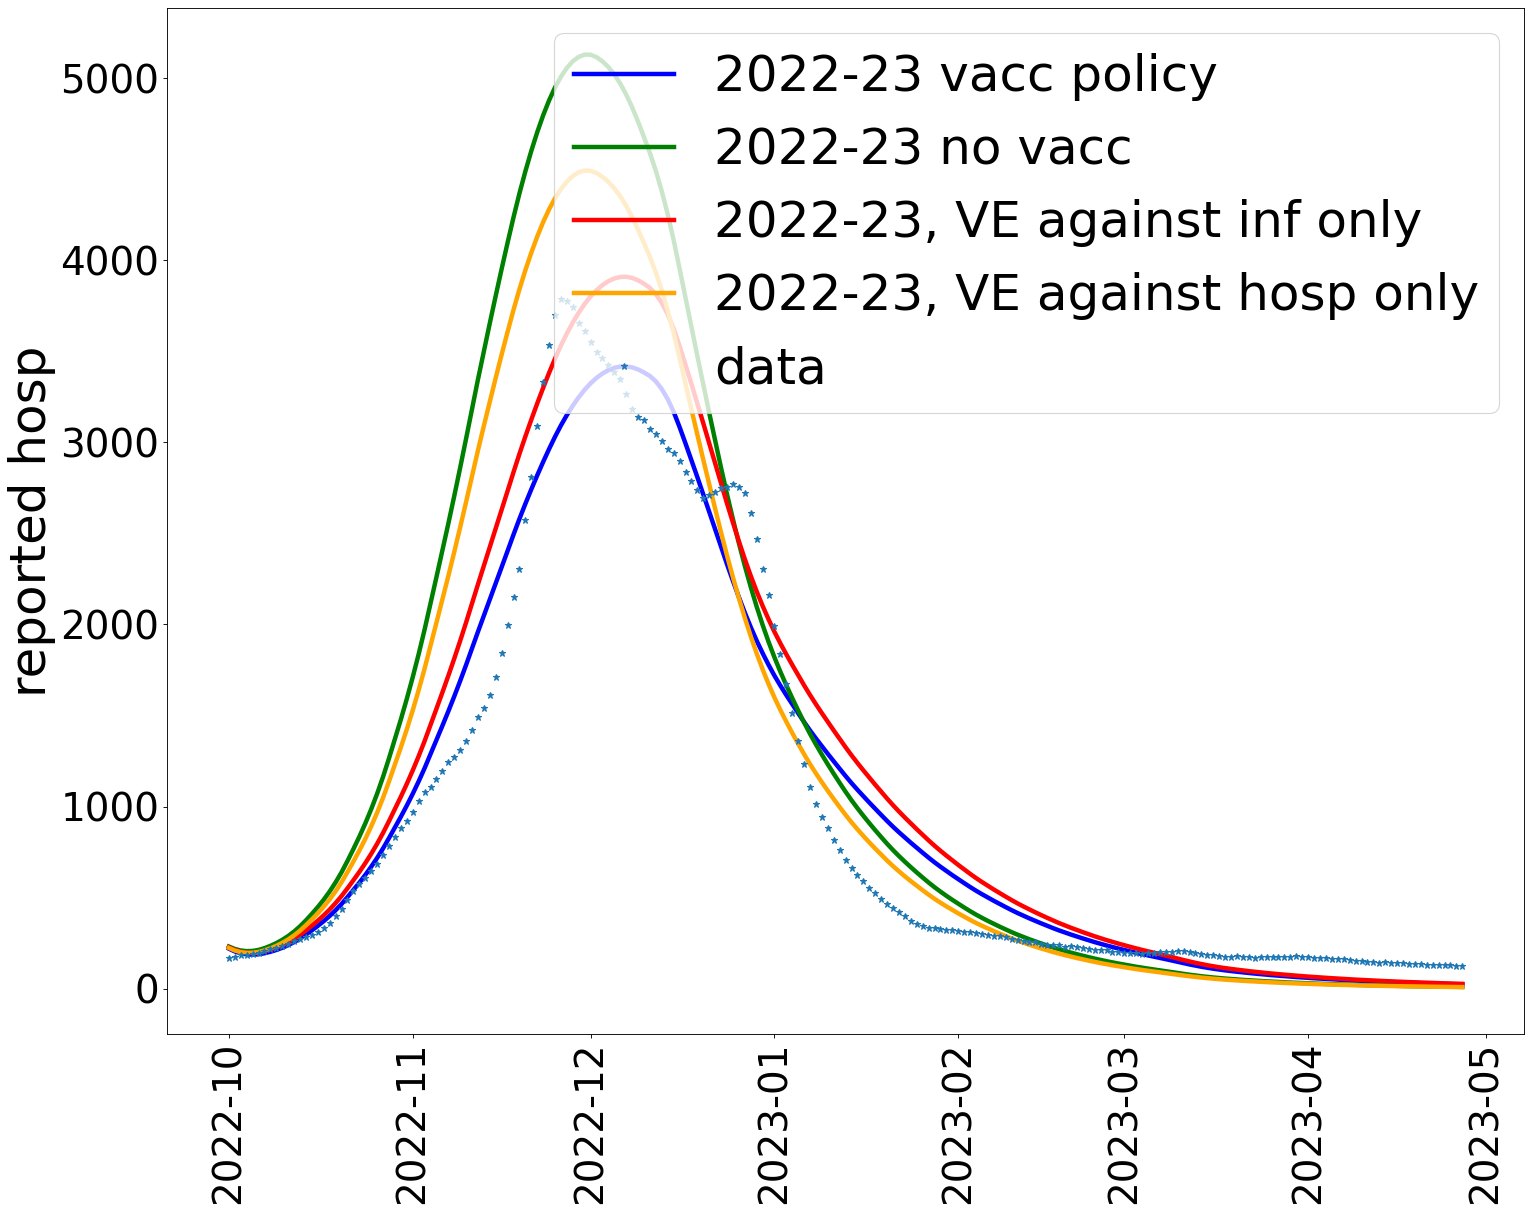

In [50]:
import matplotlib.dates as mdates
drange1 = pd.date_range("2022-10-01", periods=209, freq="1D")
#drange2 = pd.date_range("2022-08-08", periods=206, freq="1D")
drange3 = pd.date_range("2022-10-01", periods=209, freq="1D")
fig = plt.figure(num=None, figsize=(20, 16), dpi=80, facecolor='w', edgecolor='k')
plt.rcParams.update({'font.size': 35})
#plt.plot(drange, (cases['deaths_avg']), 'r*', label = 'Reported data')
#plt.plot(drange_mon, (cases2['deaths_d_avg']), 'r*', label = 'reported data')
#fig, ax = plt.subplots()
#plt_1 = plt.figure(figsize=(20, 16))
#ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m-%d"))
#ax.xaxis.set_minor_formatter(mdates.DateFormatter("%Y-%m-%d"))
_=plt.xticks(rotation=90)  

plt.plot(drange1, H_ov_avg, 'b', label = '2022-23 vacc policy', lw =4)
plt.plot(drange1, H_ov_avg_1, 'g', label = '2022-23 no vacc', lw =4)
plt.plot(drange1, H_ov_avg_2, 'r', label = '2022-23, VE against inf only', lw =4)
plt.plot(drange1, H_ov_avg_3, 'orange', label = '2022-23, VE against hosp only', lw =4)

#plt.plot(drange1, H_ov_avg2, 'r', label = 'high - pes', lw =4)
#plt.plot(drange1, H_ov_avg3, 'gray', label = 'low - pes', lw =4)


plt.plot(drange3, hosp_avg2, '*', label = 'data', lw =4)


#plt.plot(drange3, vacc_2[2,:])
#plt.plot(drange3, vacc_3[2,:])
#plt.plot(drange1, I_ov_avg0, label = 'Baseline (no-Omicron)', lw =4)

#plt.axis([19100, 19185, 0, 0.2e6])
plt.ylabel('reported hosp', fontsize = 45)

plt.legend(fontsize = 45)
plt.tight_layout()
#plt.savefig('fitus hosp')
plt.savefig("flu_fig_det/{}_Hosp.jpeg".format(state))

In [51]:
#plt.plot(M_ovv)


In [183]:
import os
os.makedirs('fit_param_FLUREDO/'+state+'', exist_ok=True)

In [184]:
Save_par = [k1, k3, cof_b, cof_y, cof_z]
np.savetxt('fit_param_FLUREDO/'+state+'/popt.csv', popt, delimiter=',')
np.savetxt('fit_param_FLUREDO/'+state+'/np.diag(pcov).csv', pcov, delimiter=',')
#np.savetxt('INPUT/fit_param_FLUREDO/'+state+'/param.csv', Save_par, delimiter=',')
#np.savetxt('INPUT/fit_param_FLUREDO/'+state+'/M2_0.csv', M2_0, delimiter=',')
#np.savetxt('INPUT/fit_param_FLUREDO/'+state+'/M3_0.csv', M3_0, delimiter=',')

In [56]:
cum_hosp_fit0 = np.zeros([202])
cum_hosp_fit1 = np.zeros([202])
cum_hosp_fit2 = np.zeros([202])
cum_hosp_fit3 = np.zeros([202])
cum_hosp_fit4 = np.zeros([202])
cum_hosp_fit5 = np.zeros([202])
for i in range(1,202):
    cum_hosp_fit0[i] = cum_hosp_fit0[i-1] + (H_ov_avgb0[i+7]/data_dem[0])*100000
    cum_hosp_fit1[i] = cum_hosp_fit1[i-1] + (H_ov_avgb1[i+7]/data_dem[1])*100000
    cum_hosp_fit2[i] = cum_hosp_fit2[i-1] + (H_ov_avgb2[i+7]/data_dem[2])*100000
    cum_hosp_fit3[i] = cum_hosp_fit3[i-1] + (H_ov_avgb3[i+7]/data_dem[3])*100000
    cum_hosp_fit4[i] = cum_hosp_fit4[i-1] + (H_ov_avgb4[i+7]/data_dem[4])*100000
    cum_hosp_fit5[i] = cum_hosp_fit5[i-1] + (H_ov_avgb5[i+7]/data_dem[5])*100000

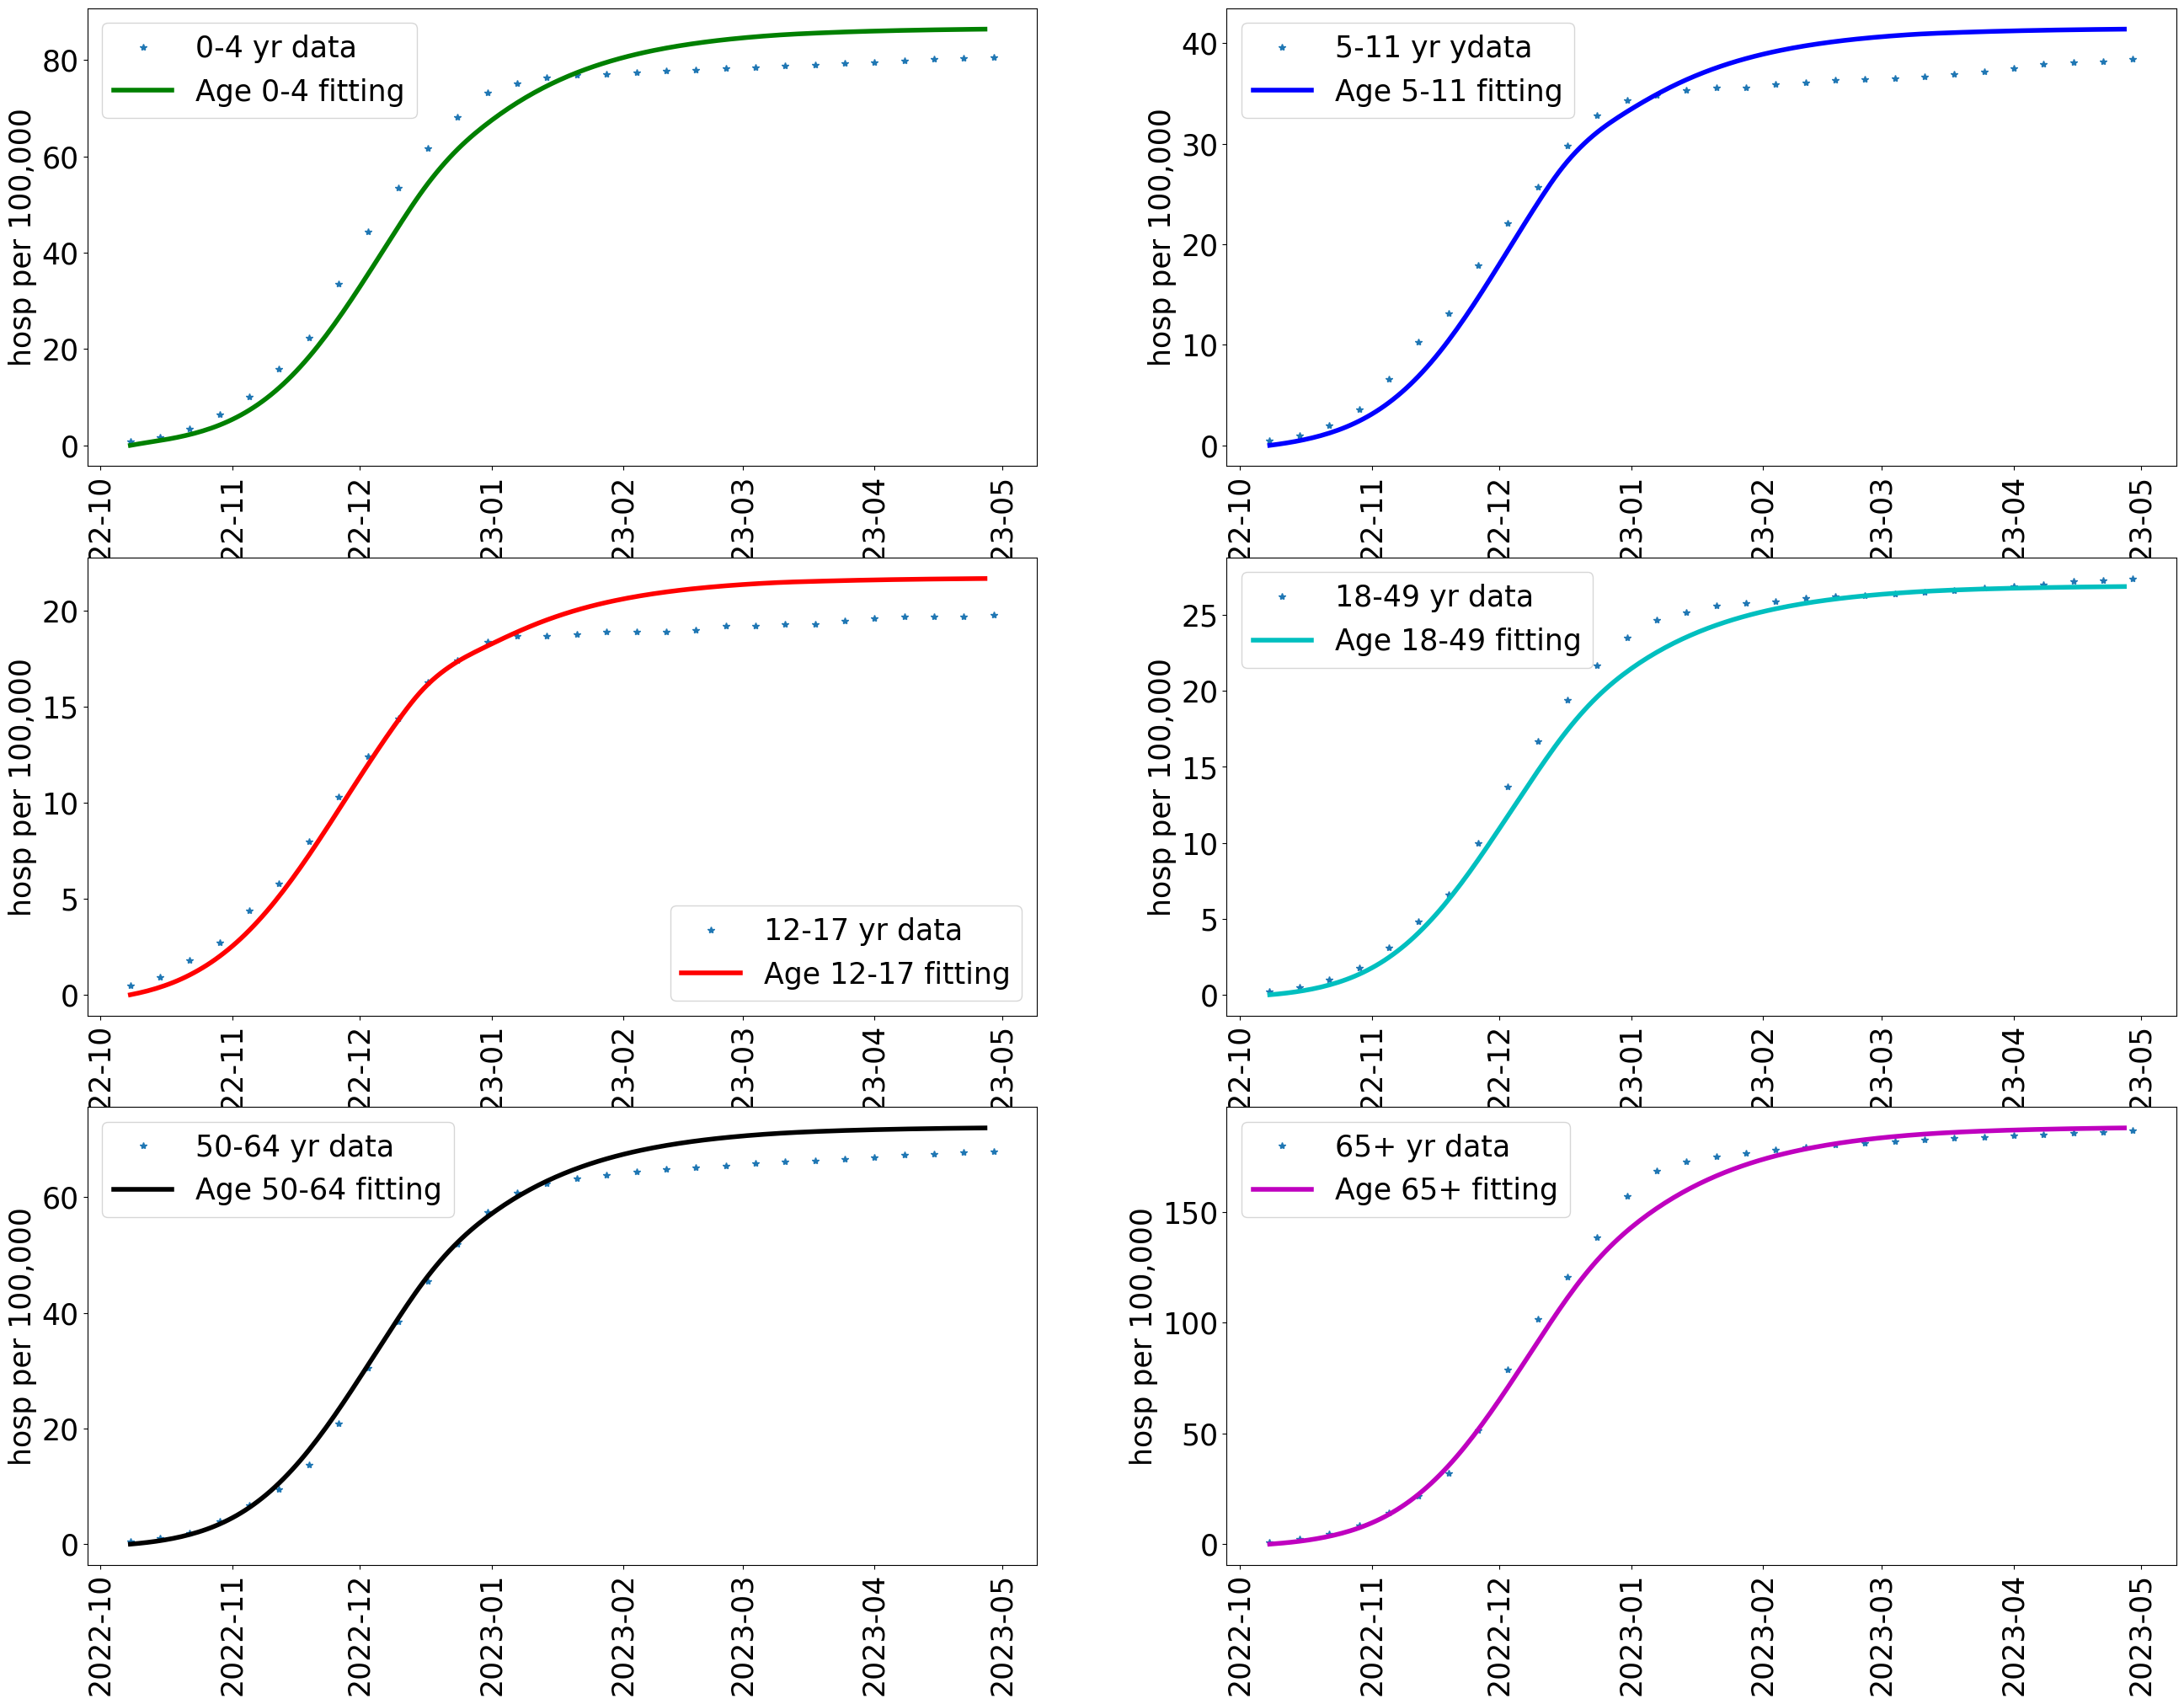

In [58]:
fig = plt.figure(figsize=(32, 24))
drange1 = pd.date_range("2022-10-08", periods=30, freq="7D")
drange2 = pd.date_range("2022-10-08", periods=202, freq="1D")

plt.subplot(3, 2, 1)
#plt.figure(num=None, figsize=(12, 8), dpi=80, facecolor='w', edgecolor='k')
plt.rcParams.update({'font.size': 25})
_=plt.xticks(rotation=90) 
plt.plot(drange1, flu_age_04_array, '*', label = '0-4 yr data', lw =20)
plt.plot(drange2, cum_hosp_fit0,'g', label = 'Age 0-4 fitting', lw =4)
plt.ylabel('hosp per 100,000')
plt.legend()

plt.subplot(3, 2, 2)
#plt.figure(num=None, figsize=(12, 8), dpi=80, facecolor='w', edgecolor='k')
plt.rcParams.update({'font.size': 25})
_=plt.xticks(rotation=90) 
plt.plot(drange1, flu_age_511_array, '*', label = '5-11 yr ydata', lw =20)
plt.plot(drange2, cum_hosp_fit1,'b', label = 'Age 5-11 fitting', lw =4)
plt.ylabel('hosp per 100,000')
plt.legend()

plt.subplot(3, 2, 3)
#plt.figure(num=None, figsize=(12, 8), dpi=80, facecolor='w', edgecolor='k')
plt.rcParams.update({'font.size': 25})
_=plt.xticks(rotation=90) 
plt.plot(drange1, flu_age_1217_array, '*', label = '12-17 yr data', lw =20)
plt.plot(drange2, cum_hosp_fit2,'r', label = 'Age 12-17 fitting', lw =4)
plt.ylabel('hosp per 100,000')
plt.legend()

plt.subplot(3, 2, 4)
#plt.figure(num=None, figsize=(12, 8), dpi=80, facecolor='w', edgecolor='k')
plt.rcParams.update({'font.size': 25})
_=plt.xticks(rotation=90) 
plt.plot(drange1, flu_age_1849_array, '*', label = '18-49 yr data', lw =20)
plt.plot(drange2, cum_hosp_fit3,'c', label = 'Age 18-49 fitting', lw =4)
plt.ylabel('hosp per 100,000')
plt.legend()


plt.subplot(3, 2, 5)
#plt.figure(num=None, figsize=(12, 8), dpi=80, facecolor='w', edgecolor='k')
plt.rcParams.update({'font.size': 25})
_=plt.xticks(rotation=90) 
plt.plot(drange1, flu_age_5064_array, '*', label = '50-64 yr data', lw =20)
plt.plot(drange2, cum_hosp_fit4,'k', label = 'Age 50-64 fitting', lw =4)
plt.ylabel('hosp per 100,000')
plt.legend()

plt.subplot(3, 2, 6)
#plt.figure(num=None, figsize=(12, 8), dpi=80, facecolor='w', edgecolor='k')
plt.rcParams.update({'font.size': 25})
_=plt.xticks(rotation=90) 
plt.plot(drange1, flu_age_65_array, '*', label = '65+ yr data', lw =20)
plt.plot(drange2, cum_hosp_fit5,'m', label = 'Age 65+ fitting', lw =4)
plt.ylabel('hosp per 100,000')
plt.legend()

plt.show()

In [185]:
def tau_cal(x): ## including stochasticity through tau-leap
    x=int(x)
    if (x>=0):
        tau_leap=int(np.random.poisson(x, 1))
    else:
        tau_leap=int(np.random.poisson(x*(-1), 1))*(-1)
    return tau_leap

In [186]:
np.sqrt(np.diag(pcov)[0]/(N*N))

0.0015644836788185877

In [187]:
def simulation_st(x, popt, sc1, sc2, seed_list):
    
    x0, x1, x2, x3,mag, ratio1, ratio2, ratio3 = popt[0], popt[1], popt[2], popt[3],popt[4], popt[5], popt[6],popt[7]
    Nd = 216# earlier it was 357 here, now I am taking 301 
    dt = 1 #time step
    t = 0  #number of steps
    bita = x0/N
    S = np.zeros([6])
    E = np.zeros([6, ])
    I = np.zeros([6, ])
    Ir = np.zeros([6, ])
    H = np.zeros([6, ])
    Hr = np.zeros([6, ])
    R = np.zeros([6, ])
    
    S1 = np.zeros([6])
    E1 = np.zeros([6, ])
    I1 = np.zeros([6, ])
    Ir1 = np.zeros([6, ])
    H1 = np.zeros([6, ])
    Hr1 = np.zeros([6, ])
    R1 = np.zeros([6, ])
    M3_0 = set_imm(init_imm)    
    D = np.zeros([6, ])
    M = np.array(M3_0)
    M1 = np.zeros([6, ])
    Mv = np.array(M_0)
  
    sigma = 0.000

    def dW(delta_t):
        return np.random.normal(loc=0.0, scale=np.sqrt(delta_t))
    
    def g(y, sigma):
        return sigma*(y)
    
    
    case_c = np.zeros([6, ])
    hosp_c = np.zeros([6, ])
   
    S1_new = np.zeros([6, ])
    E1_new = np.zeros([6, ])
    I1_new = np.zeros([6, ])
    Ir1_new = np.zeros([6, ])
    H1_new = np.zeros([6, ])
    Hr1_new = np.zeros([6, ])
    R1_new = np.zeros([6, ])
    D_new = np.zeros([6, ])  
    
    S_new = np.zeros([6, ])
    E_new = np.zeros([6, ])
    I_new = np.zeros([6, ])
    Ir_new = np.zeros([6, ])
    H_new = np.zeros([6, ])
    Hr_new = np.zeros([6, ])
    R_new = np.zeros([6, ])

    D_age = np.zeros([6, ])
    
    M_new = np.array(M3_0)
    M1_new = np.zeros([6, ])
    Mv_new = np.zeros([6, ])
        
    case_c_new = np.zeros([6, ])
    hosp_c_new = np.zeros([6, ])
    
    Ic_ov = np.zeros([Nd, ])
    hosp_cc = np.zeros([Nd, ])
    hosp_cc1 = np.zeros([Nd, ])
    hosp_cc2 = np.zeros([Nd, ])
    hosp_cc3 = np.zeros([Nd, ])
    hosp_cc4 = np.zeros([Nd, ])
    hosp_cc5 = np.zeros([Nd, ])
    hosp_cc0 = np.zeros([Nd, ])
    Ia_ov = np.zeros([Nd, ])
    cum = np.zeros([Nd, ])
    D_ov = np.zeros([Nd, ])
    symp_r = np.zeros([Nd, ])

    S_ov = np.zeros([Nd, ])
    E_ov = np.zeros([Nd, ])
    P_ov = np.zeros([Nd, ])
    I_ov = np.zeros([Nd, ])
    H_ov = np.zeros([Nd, ])
    R_ov = np.zeros([Nd, ])
    M_ov = np.zeros([Nd, 6])
    M1_ov = np.zeros([Nd, 6])
    Mv_ov = np.zeros([Nd, 6])
    symp_rr = np.zeros([Nd, 6])
    M_ovv = np.zeros([Nd, ])
    M1_ovv = np.zeros([Nd, 6])
    Mv_ovv = np.zeros([Nd, ])
    Mv_ovv19 = np.zeros([Nd, 6])
    prot = np.zeros([Nd, 6])
    
    bita_s = np.zeros([Nd, ])    
    count = 0

    
    
    E0 = [ratio1*x2,ratio2*x2,ratio2*x2,ratio2*x2,ratio2*x2,ratio3*x2]
    I_0 = [ratio1*x1*IHR[0],ratio2*x1*IHR[1],ratio2*x1*IHR[2],ratio2*x1*IHR[3],ratio2*x1*IHR[4],ratio3*x1*IHR[5]]
    Ir_0 = [ratio1*x1*IRec[0],ratio2*x1*IRec[1],ratio2*x1*IRec[2],ratio2*x1*IRec[3],ratio2*x1*IRec[4],ratio3*x1*IRec[5]]
    H0 = [hosp_ratio[0]*x3*HDR[0],hosp_ratio[1]*x3*HDR[1],hosp_ratio[2]*x3*HDR[2],hosp_ratio[3]*x3*HDR[3],hosp_ratio[4]*x3*HDR[4],hosp_ratio[5]*x3*HDR[5]]
    Hr0 = [hosp_ratio[0]*x3*HDRec[0],hosp_ratio[1]*x3*HDRec[1],hosp_ratio[2]*x3*HDRec[2],hosp_ratio[3]*x3*HDRec[3],hosp_ratio[4]*x3*HDRec[4],hosp_ratio[5]*x3*HDRec[5]]
    
    w2 = np.log(2)/(18*60)
    w1 = np.log(2)/(3*60)
    ww = 1/(10)
    
    D0 = [0/6  for n in Ni]
    S10 = [Ni[n] - E0[n] - I_0[n] - Ir_0[n] - H0[n] - Hr0[n] - D0[n] for n in range(6)]
    R0 = [0 for n in Ni]  
    S = np.asarray(S10)
    E = np.asarray(E0)
    I = np.asarray(I_0); Ir=np.asarray(Ir_0); H = np.asarray(H0);Hr = np.asarray(Hr0); D = np.asarray(D0); R = np.asarray(R0); M = np.asarray(M3_0)
    if (sc2 == "baseline"):
        Mv = np.asarray(M2_0)
    if (sc2 == "target"):
        Mv = np.zeros([6, ])
        Mv[0]=M2_0[0]*(sum(vacc_2[0,:])/sum(vacc_1[0,:]))
        Mv[1]=M2_0[1]*(sum(vacc_2[1,:])/sum(vacc_1[1,:]))
        Mv[2]=M2_0[2]*(sum(vacc_2[2,:])/sum(vacc_1[2,:]))
        Mv[3]=M2_0[3]*(sum(vacc_2[3,:])/sum(vacc_1[3,:]))
        Mv[4]=M2_0[4]*(sum(vacc_2[4,:])/sum(vacc_1[4,:]))
        Mv[5]=M2_0[5]*(sum(vacc_2[5,:])/sum(vacc_1[5,:]))
    if (sc2 == "none"):
        Mv = np.zeros([6, ])
    for tt in range(int(Nd/dt)):        
        zx = 1
        seed_index=int(seed_list)
        np.random.seed(seed_index)
        rnd=np.random.normal(0, np.sqrt(np.diag(pcov)[0]/(N*N)), 1)#np.random.normal(0, (np.sqrt(np.diag(pcov))/N)[0], 1)
        bita = (mag*(zz2[count]-1)+1)*((x0/N)+rnd)
        CM = CM_all
        if (school[count] == 0):
            CM = CM - CM_s

        if (work[count] == 0):
            CM = CM - CM_w #- CM_s
                      
        K_o = [4, 4, 4, 1.5, 1.5, 1.5]# natural imm against flu inf
        K1_o = [4, 4, 4, 1.5, 1.5, 1.5]# natural imm against flu inf
        Kh_o = [4, 4, 4, 0.5, 0.5, 0.5]# natural imm against flu hosp
        K1h_o = [4, 4, 4, 0.5, 0.5, 0.5] # natural imm against flu hosp
        '''
        if (sc1 == "normal"):
            #Kv_o = [1.5, 1.5, 1.5, 1.5, 1.5, 1.5]
            Kv_o = [1.08, 1.08, 1.08, 0.563, 0.563, 0.316]#vacc eff against flu infection
            Kvh_o = [2.125, 2.125, 2.125, 1.04, 1.04, 0.54]# vacc eff against flu hosp
        if (sc1 == "aginstinf"):
            #Kv_o = [0.43, 0.43, 0.43, 0.43, 0.43, 0.43]
            Kv_o = [1.08, 1.08, 1.08, 0.563, 0.563, 0.316]#vacc eff against flu infection
            Kvh_o = [0, 0, 0, 0, 0, 0]# vacc eff against flu hosp
        if (sc1 == "aginsthosp"):
            #Kv_o = [0.43, 0.43, 0.43, 0.43, 0.43, 0.43]
            Kv_o = [0, 0, 0, 0, 0, 0]#vacc eff against flu infection
            Kvh_o = [2.125, 2.125, 2.125, 1.04, 1.04, 0.54]# vacc eff against flu hosp
        '''
        
        '''
        ####our metanalysis proposal 
        if (sc1 == "normal"):
            #Kv_o = [1.5, 1.5, 1.5, 1.5, 1.5, 1.5]
            Kv_o = [0.7544, 0.7544, 0.7544, 0.5385, 0.5385, 0.3158]#vacc eff against flu infection
            Kvh_o = [0.7857, 0.7857, 0.7857, 0.2346,0.2346,0.04]# vacc eff against flu hosp
        if (sc1 == "aginstinf"):
            #Kv_o = [0.43, 0.43, 0.43, 0.43, 0.43, 0.43]
            Kv_o = [0.7544, 0.7544, 0.7544, 0.5385, 0.5385, 0.3158]#vacc eff against flu infection
            Kvh_o = [0, 0, 0, 0, 0, 0]# vacc eff against flu hosp
        if (sc1 == "aginsthosp"):
            #Kv_o = [0.43, 0.43, 0.43, 0.43, 0.43, 0.43]
            Kv_o = [0, 0, 0, 0, 0, 0]#vacc eff against flu infection
            Kvh_o = [0.7857, 0.7857, 0.7857, 0.2346,0.2346,0.04]# vacc eff against flu hosp
        '''   
        ###rebecca A:
        '''
        if (sc1 == "normal"):
            #Kv_o = [1.5, 1.5, 1.5, 1.5, 1.5, 1.5]
            Kv_o = [0.3154, 0.3154, 0.3154, 0.25, 0.25, 0.1765]#vacc eff against flu infection
            Kvh_o = [1.381, 1.381, 1.381, 0.5156,0.5156,0.1628]# vacc eff against flu hosp
        if (sc1 == "aginstinf"):
            #Kv_o = [0.43, 0.43, 0.43, 0.43, 0.43, 0.43]
            Kv_o = [0.3154, 0.3154, 0.3154, 0.25, 0.25, 0.1765]#vacc eff against flu infection
            Kvh_o = [0, 0, 0, 0, 0, 0]# vacc eff against flu hosp
        if (sc1 == "aginsthosp"):
            #Kv_o = [0.43, 0.43, 0.43, 0.43, 0.43, 0.43]
            Kv_o = [0, 0, 0, 0, 0, 0]#vacc eff against flu infection
            Kvh_o = [1.381, 1.381, 1.381, 0.5156,0.5156,0.1628]# vacc eff against flu hosp
        
        '''
        ###rebecca B:
        '''
        if (sc1 == "normal"):
            #Kv_o = [1.5, 1.5, 1.5, 1.5, 1.5, 1.5]
            Kv_o = [0.4493, 0.4493, 0.4493, 0.4493, 0.4493, 0.4493]#vacc eff against flu infection
            Kvh_o = [1.127, 1.127, 1.127, 0.2987,0.2987,0]# vacc eff against flu hosp
        if (sc1 == "aginstinf"):
            #Kv_o = [0.43, 0.43, 0.43, 0.43, 0.43, 0.43]
            Kv_o = [0.4493, 0.4493, 0.4493, 0.4493, 0.4493, 0.4493]#vacc eff against flu infection
            Kvh_o = [0, 0, 0, 0, 0, 0]# vacc eff against flu hosp
        if (sc1 == "aginsthosp"):
            #Kv_o = [0.43, 0.43, 0.43, 0.43, 0.43, 0.43]
            Kv_o = [0, 0, 0, 0, 0, 0]#vacc eff against flu infection
            Kvh_o = [1.127, 1.127, 1.127, 0.2987,0.2987,0]# vacc eff against flu hosp        
        '''
        '''
        #### sensitivity analysis
        ## low scenario 
        if (sc1 == "normal"):
            #Kv_o = [1.5, 1.5, 1.5, 1.5, 1.5, 1.5]
            Kv_o = [0.3889, 0.3889, 0.3889, 0.1628, 0.1628, 0]#vacc eff against flu infection
            Kvh_o = [0.3333, 0.3333, 0.3333, 0.2346,0.2346,0.1111]# vacc eff against flu hosp
        if (sc1 == "aginstinf"):
            #Kv_o = [0.43, 0.43, 0.43, 0.43, 0.43, 0.43]
            Kv_o = [0.3889,0.3889, 0.3889, 0.1628, 0.1628, 0]#vacc eff against flu infection
            Kvh_o = [0, 0, 0, 0, 0, 0]# vacc eff against flu hosp
        if (sc1 == "aginsthosp"):
            #Kv_o = [0.43, 0.43, 0.43, 0.43, 0.43, 0.43]
            Kv_o = [0, 0, 0, 0, 0, 0]#vacc eff against flu infection
            Kvh_o = [0.3333, 0.3333, 0.3333, 0.2346,0.2346,0.1111]# vacc eff against flu hosp
        
        
        '''
        '''
        ###high scenario 
        if (sc1 == "normal"):
            #Kv_o = [1.5, 1.5, 1.5, 1.5, 1.5, 1.5]
            Kv_o = [1.2222, 1.2222, 1.2222, 1.0408, 1.0408, 0.1818]#vacc eff against flu infection
            Kvh_o = [1.3809, 1.3809, 1.3809, 0.2195,0.2195,0]# vacc eff against flu hosp
        if (sc1 == "aginstinf"):
            #Kv_o = [0.43, 0.43, 0.43, 0.43, 0.43, 0.43]
            Kv_o = [1.2222, 1.2222, 1.2222, 1.0408, 1.0408, 0.1818]#vacc eff against flu infection
            Kvh_o = [0, 0, 0, 0, 0, 0]# vacc eff against flu hosp
        if (sc1 == "aginsthosp"):
            #Kv_o = [0.43, 0.43, 0.43, 0.43, 0.43, 0.43]
            Kv_o = [0, 0, 0, 0, 0, 0]#vacc eff against flu infection
            Kvh_o = [1.3809, 1.3809, 1.3809, 0.2195,0.2195,0]# vacc eff against flu hosp
        
        
        ### NEW VE (METABIN AND VISION)
        '''
        if (sc1 == "normal"):
            #Kv_o = [1.5, 1.5, 1.5, 1.5, 1.5, 1.5]
            Kv_o = [0.7544, 0.7544, 0.7544, 0.2658, 0.2658, 0]#vacc eff against flu infection
            Kvh_o = [0.7857, 0.7857, 0.7857, 0.0309,0.0309,0.6949]# vacc eff against flu hosp
        if (sc1 == "aginstinf"):
            #Kv_o = [0.43, 0.43, 0.43, 0.43, 0.43, 0.43]
            Kv_o = [0.7544, 0.7544, 0.7544, 0.2658, 0.2658, 0]#vacc eff against flu infection
            Kvh_o = [0, 0, 0, 0, 0, 0]# vacc eff against flu hosp
        if (sc1 == "aginsthosp"):
            #Kv_o = [0.43, 0.43, 0.43, 0.43, 0.43, 0.43]
            Kv_o = [0, 0, 0, 0, 0, 0]#vacc eff against flu infection
            Kvh_o = [0.7857, 0.7857, 0.7857, 0.0309,0.0309,0.6949]# vacc eff against flu hospp

        
        
        for i in range(6):   
                
            prot_inf = K_o[i]*M[i] + K1_o[i]*M1[i] + Kv_o[i]*Mv[i]
            prot_inf1 = K_o[i]*M[i] + K1_o[i]*M1[i] + Kv_o[i]*Mv[i]
            prot_hosp = Kh_o[i]*M[i] + K1h_o[i]*M1[i] + Kvh_o[i]*Mv[i]# protec against hosp 
            prot_hosp1 = Kh_o[i]*M[i] + K1h_o[i]*M1[i] + Kvh_o[i]*Mv[i]# protec against hosp 

            S_new[i] = S[i] + dt*(-tau_cal(bita/(1 + prot_inf)*computerate(i, CM, 1, I+Ir, Ni)*S[i]) - tau_cal(bita/(1 + prot_inf1)*computerate(i, CM, 1, I1+Ir1, Ni)*S[i]) + tau_cal(ww*R[i]) + tau_cal(ww*R1[i]))
            E_new[i] = E[i] + dt*(tau_cal(bita/(1 + prot_inf)*computerate(i, CM, 1, I+Ir , Ni)*S[i]) - tau_cal(g_E*E[i]*((IRec[i]+prot_hosp)/(1 + prot_hosp)))-tau_cal(g_E*E[i]*(IHR[i]/(1 + prot_hosp))))
                
            case_c_new[i] = case_c[i] + dt*tau_cal(g_E*E[i]) + tau_cal(g_E*E1[i])
            Ir_new[i]=Ir[i]+dt*(tau_cal(g_E*E[i]*((IRec[i]+prot_hosp)/(1 + prot_hosp)))-tau_cal(g_Recovery*Ir[i]))
            I_new[i] = I[i] + dt*(tau_cal(g_E*E[i]*(IHR[i]/(1 + prot_hosp))) - tau_cal(g_Recovery*I[i]))
            hosp_c_new[i] = hosp_c[i] + dt*(tau_cal(g_Recovery*I[i]) + tau_cal(g_Recovery*I1[i])) 
            
            Hr_new[i] = Hr[i] + dt*(tau_cal(g_Recovery*I[i]*HDRec[i])-tau_cal(g_hosp*Hr[i]))    
            H_new[i] = H[i] + dt*(tau_cal(g_Recovery*I[i]*HDR[i])  - tau_cal(g_hosp*H[i]))
            D_new[i] = D[i] + dt*(tau_cal(g_hosp*H[i]) + tau_cal(g_hosp*H1[i])) 
            R_new[i] = R[i] + dt*(tau_cal(g_hosp*Hr[i]) + tau_cal(g_Recovery*Ir[i]) - tau_cal(ww*R[i]))
                
            E1_new[i] = E1[i] + dt*(tau_cal(bita/(1 + prot_inf1)*computerate(i, CM, 1, I1+Ir1, Ni)*S[i]) - tau_cal(g_E*E1[i]))
            Ir1_new[i]=Ir1[i]+dt*(tau_cal(g_E*E1[i]*((IRec[i]+prot_hosp1)/(1 + prot_hosp1)))-tau_cal(g_Recovery*Ir1[i]))
            I1_new[i] = I1[i] + dt*(tau_cal(g_E*E1[i]*(IHR[i]/(1 + prot_hosp1))) - tau_cal(g_Recovery*I1[i]))
            # change seed to 0 will have no difference in pes and opt scenarios 
            #I1_new[i] = I1[i] + dt*(0*(data_dem[i]/N) + g_E*E1[i]  - g_Recovery*(IHR[i]/(1 + prot_inf1))*I1[i] - g_Recovery*IRec[i]*I1[i]) + I1_g

            Hr1_new[i] = Hr1[i] + dt*(tau_cal(g_Recovery*I1[i]*HDRec[i])-tau_cal(g_hosp*Hr1[i]))
            H1_new[i] = H1[i] + dt*(tau_cal(g_Recovery*I1[i]*HDR[i])  - tau_cal(g_hosp*H1[i]))
            R1_new[i] = R1[i] + dt*(tau_cal(g_hosp*Hr1[i]) + tau_cal(g_Recovery*Ir1[i]) - tau_cal(ww*R1[i]))
                 #hosp_c[i] = H_new[i] + H1_new[i]
                # vaccc(tt, V, dt, Ni, time1, time2, time3, time4, time5):
      
               
            if (count <= 480):
                if (sc2 == "baseline"):   
                    vacc_ref = vacc_1
                if (sc2 == "target"):   
                    vacc_ref = vacc_2
                if (sc2 == "none"):   
                    vacc_ref = vacc_3
                Mv_new[i] = Mv[i] + dt*(- w1*Mv[i] + k1[i]*vacc_ref[i, count])
                M1_new[i] = M1[i] + dt*(-w2*M1[i] + k3[i]*ww*R1[i]/(prot_inf1))
                M_new[i] = M[i] + dt*(-w2*M[i] + k3[i]*ww*R[i]/(prot_inf))
                prot[count,i] = (1/(1+prot_inf))
                            
                            
        S = S_new; E = E_new; I = I_new; case_c = case_c_new; hosp_c = hosp_c_new; H = H_new; D = D_new; R = R_new; M = M_new; M1 = M1_new; Mv = Mv_new;
        S1 = S1_new; E1 = E1_new; I1 = I1_new; H1 = H1_new; R1 = R1_new; Ir=Ir_new; Hr=Hr_new; Ir1=Ir1_new; Hr1=Hr1_new
        if(tt % int(1/dt) == 0):
            #bita_s[count] = np.sum(np.array(K1_b)*np.array(M22)) + np.sum(np.array(K1_v)*np.array(M)) + np.sum(np.array(K1_o12)*np.array(MX))
           
            for i in range(6):
                Mv_ovv19[count, i] = Mv[i]
               # prot[count,i] = K_o[i]*M[i] + K1_o[i]*M1[i] + Kv_o[i]*Mv[i]
                
           
        
            Ic_ov[count] = np.sum(case_c)
            D_ov[count] = np.sum(D)
            S_ov[count] = np.sum(S)
            cum[count] = np.sum(case_c)
            hosp_cc[count] = np.sum(hosp_c)
            hosp_cc0[count] = hosp_c[0]
            hosp_cc1[count] = hosp_c[1]
            hosp_cc2[count] = hosp_c[2]
            hosp_cc3[count] = hosp_c[3]
            hosp_cc4[count] = hosp_c[4]
            hosp_cc5[count] = hosp_c[5]
            
            #symp_r[count] = np.sum(a_bar)/(6*g_E)

            M_ovv[count] = np.sum(np.array(data_dem)*np.array(M))/N
            M1_ovv[count] = np.sum(np.array(data_dem)*np.array(M1))/N
            Mv_ovv[count] = np.sum(np.array(data_dem)*np.array(Mv))/N

            
            E_ov[count] = np.sum(E)
            I_ov[count] = np.sum(I+H)
            H_ov[count] = np.sum(H)
            R_ov[count] = np.sum(R)
            count = count+1
 
    
    D_age = np.sum(D)      
    D2_ova = cum_to_active(Ic_ov)
    H_ova = cum_to_active(hosp_cc)
    H_ova0 = cum_to_active(hosp_cc0)
    H_ova1 = cum_to_active(hosp_cc1)
    H_ova2 = cum_to_active(hosp_cc2)
    H_ova3 = cum_to_active(hosp_cc3)
    H_ova4 = cum_to_active(hosp_cc4)
    H_ova5 = cum_to_active(hosp_cc5)
    
    D3_ova = cum_to_active(D_ov)
    I_ov_avg = np.zeros([Nd-7, ])
    D_ov_avg = np.zeros([Nd-7, ])
    H_ov_avg = np.zeros([Nd-7, ])
    H_ov_avg0 = np.zeros([Nd-7, ])
    H_ov_avg1 = np.zeros([Nd-7, ])
    H_ov_avg2 = np.zeros([Nd-7, ])
    H_ov_avg3 = np.zeros([Nd-7, ])
    H_ov_avg4 = np.zeros([Nd-7, ])
    H_ov_avg5 = np.zeros([Nd-7, ])
    for i in range(Nd-7):
        
        I_ov_avg[i] = max(np.mean(D2_ova[i:i+7]), 0)
        D_ov_avg[i] = max(np.mean(D3_ova[i:i+7]), 0)
        H_ov_avg[i] = max(np.mean(H_ova[i:i+7]), 0)
        H_ov_avg0[i] = max(np.mean(H_ova0[i:i+7]), 0)
        H_ov_avg1[i] = max(np.mean(H_ova1[i:i+7]), 0)
        H_ov_avg2[i] = max(np.mean(H_ova2[i:i+7]), 0)
        H_ov_avg3[i] = max(np.mean(H_ova3[i:i+7]), 0)
        H_ov_avg4[i] = max(np.mean(H_ova4[i:i+7]), 0)
        H_ov_avg5[i] = max(np.mean(H_ova5[i:i+7]), 0)
        

    peak_H = np.max(H_ov_avg)
    peak_D = np.max(H_ov_avg)
    peak_d_H=0
    peak_d_D=0
    
    for i in range(Nd-7):
        if (H_ov_avg[i] == peak_H):
            peak_d_H = i
            
        if (D_ov_avg[i] == peak_D):
            peak_d_D = i  
  

    return I_ov_avg, D_ov_avg, H_ov_avg, D2_ova,M_ovv, Mv_ovv19, M1_ovv, Mv_ovv, S_ov, E_ov, bita_s, R_ov, I_ov, peak_H, peak_D, peak_d_H, peak_d_D,H_ov_avg0,H_ov_avg1,H_ov_avg2,H_ov_avg3,H_ov_avg4,H_ov_avg5
    #return H_ov_avg

In [188]:
from numpy import genfromtxt ## generated seed table for respective comparison insteead of tptally random 
seed_table= genfromtxt('seed.csv', delimiter=',')
seed_table = seed_table[:,2]

In [159]:
sc1 = "normal"
sc2 = "baseline"
I_ov_avg, D_ov_avg, H_ov_avg, D2_ova,M_ovv, Mv_ovv19, M1_ovv, Mv_ovv, S_ov, E_ov, bita_s, R_ov, I_ov, peak_H, peak_D, peak_d_H, peak_d_D,H_ov_avg0,H_ov_avg1,H_ov_avg2,H_ov_avg3,H_ov_avg4,H_ov_avg5=simulation_st(0, popt, sc1, sc2, seed_table[1])

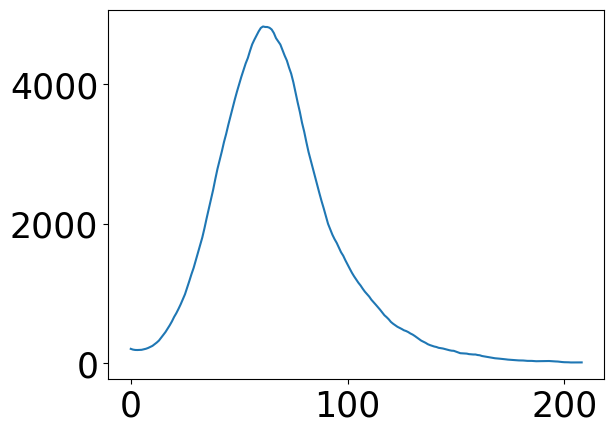

In [160]:
plt.plot(H_ov_avg)

In [73]:
Nsim = 100

In [81]:
def sim_scenario(scen):
    Nsim = 100
    simlen=209
    #popt, pcov = curve_fit(sim_hospA, xdata, ydata, p0 = [0.05*N, 0.05*N, 0.05*N, 0.05*N, 0.05*N, 0.05*N, 0.05*N, 0.0005*N, 0.0005*N, 0.00000153*N], bounds = ([0.0*N, 0.0*N, 0.0*N, 0.0*N, 0.0*N, 0.0*N, 0.0*N, 0.0*N, 0.00000*N, 0.0000000*N], [0.1*N, 0.1*N, 0.1*N, 0.1*N, 0.1*N, 0.1*N, 0.1*N, 0.02*N, 0.02*N, 0.0002*N]))
  
   #x0, x01, x02, x03, x04, x05, x06, x1, x2, x3 = popt[0], popt[1], popt[2], popt[3], popt[4], popt[5],  popt[6], popt[7], popt[8], popt[9]

    if (scen == "A"):
        sc1 = "normal"
        sc2 = "baseline"
        print('scenario ',scen, 'loaded') 
        #popt, pcov = curve_fit(sim_hospA, xdata, ydata, p0 = [0.05*N, 0.05*N, 0.05*N, 0.05*N, 0.0005*N, 0.0005*N, 0.00000153*N], bounds = ([0.0*N, 0.0*N, 0.0*N, 0.0*N, 0, 0.00000*N, 0.0000000*N], [0.1*N, 0.1*N, 0.1*N, 0.1*N, 0.02*N, 0.02*N, 0.000002*N]))
        #print(popt)
        #x0, x01, x02, x03, x1, x2, x3 = popt[0], popt[1], popt[2], popt[3], popt[4], popt[5],  popt[6]

    if (scen == "B"):
        sc1 = "normal"
        sc2 = "none"
        print('scenario ',scen, 'loaded') 
        #popt, pcov = curve_fit(sim_hospB, xdata, ydata, p0 = [0.05*N, 0.05*N, 0.05*N, 0.05*N, 0.0005*N, 0.0005*N, 0.00000153*N], bounds = ([0.0*N, 0.0*N, 0.0*N, 0.0*N, 0, 0.00000*N, 0.0000000*N], [0.1*N, 0.1*N, 0.1*N, 0.1*N, 0.02*N, 0.02*N, 0.000002*N]))
        #print(popt)
        #x0, x01, x02, x03, x1, x2, x3 = popt[0], popt[1], popt[2], popt[3], popt[4], popt[5],  popt[6]
        
    if (scen == "C"):
        sc1 = "normal"
        sc2 = "target"
        print('scenario ',scen, 'loaded') 
        #popt, pcov = curve_fit(sim_hospC, xdata, ydata, p0 = [0.05*N, 0.05*N, 0.05*N, 0.05*N, 0.0005*N, 0.0005*N, 0.00000153*N], bounds = ([0.0*N, 0.0*N, 0.0*N, 0.0*N, 0, 0.00000*N, 0.0000000*N], [0.1*N, 0.1*N, 0.1*N, 0.1*N, 0.02*N, 0.02*N, 0.000002*N]))
        #print(popt)
        #x0, x01, x02, x03, x1, x2, x3 = popt[0], popt[1], popt[2], popt[3], popt[4], popt[5],  popt[6]
    
    if (scen == "D"):
        sc1 = "aginstinf"
        sc2 = "baseline"
        print('scenario ',scen, 'loaded') 
        #popt, pcov = curve_fit(sim_hospC, xdata, ydata, p0 = [0.05*N, 0.05*N, 0.05*N, 0.05*N, 0.0005*N, 0.0005*N, 0.00000153*N], bounds = ([0.0*N, 0.0*N, 0.0*N, 0.0*N, 0, 0.00000*N, 0.0000000*N], [0.1*N, 0.1*N, 0.1*N, 0.1*N, 0.02*N, 0.02*N, 0.000002*N]))
        #print(popt)
        #x0, x01, x02, x03, x1, x2, x3 = popt[0], popt[1], popt[2], popt[3], popt[4], popt[5],  popt[6]

    if (scen == "E"):
        sc1 = "aginsthosp"
        sc2 = "baseline"
        print('scenario ',scen, 'loaded') 
        #popt, pcov = curve_fit(sim_hospD, xdata, ydata, p0 = [0.05*N, 0.05*N, 0.05*N, 0.05*N, 0.0005*N, 0.0005*N, 0.00000153*N], bounds = ([0.0*N, 0.0*N, 0.0*N, 0.0*N, 0, 0.00000*N, 0.0000000*N], [0.1*N, 0.1*N, 0.1*N, 0.1*N, 0.02*N, 0.02*N, 0.000002*N]))
        #print(popt)
        #x0, x01, x02, x03, x1, x2, x3 = popt[0], popt[1], popt[2], popt[3], popt[4], popt[5],  popt[6]
 
    

    print('fitting completed')  
    new_inf = np.zeros([simlen, Nsim])
    new_hosp = np.zeros([simlen, Nsim])
    new_death = np.zeros([simlen, Nsim])
    
    new_peak_H = np.zeros([simlen, Nsim])
    new_peak_D = np.zeros([simlen, Nsim])
    
    new_peak_d_H = np.zeros([simlen, Nsim])
    new_peak_d_D = np.zeros([simlen, Nsim])
    
    new_hosp0 = np.zeros([simlen, Nsim])
    new_hosp1 = np.zeros([simlen, Nsim])
    new_hosp2 = np.zeros([simlen, Nsim])
    new_hosp3 = np.zeros([simlen, Nsim])
    new_hosp4 = np.zeros([simlen, Nsim])
    new_hosp5 = np.zeros([simlen, Nsim])

    for i in range(Nsim):
        seed_list = seed_table[i]
        I_ov_avg, D_ov_avg, H_ov_avg, D2_ova,M_ovv, Mv_ovv19, M1_ovv, Mv_ovv, S_ov, E_ov, bita_s, R_ov, I_ov, peak_H, peak_D, peak_d_H, peak_d_D,H_ov_avg0,H_ov_avg1,H_ov_avg2,H_ov_avg3,H_ov_avg4,H_ov_avg5 = simulation_st(0, popt, sc1, sc2, seed_list)
        
        new_inf[:,i] = I_ov_avg
        new_hosp[:,i] = H_ov_avg
        new_death[:,i] = D_ov_avg
        
        new_peak_H[:,i] = peak_H
        new_peak_D[:,i] = peak_D

        new_peak_d_H[:,i] = peak_d_H
        new_peak_d_D[:,i] = peak_d_D
        
        new_hosp0[:,i] = H_ov_avg0
        new_hosp1[:,i] = H_ov_avg1
        new_hosp2[:,i] = H_ov_avg2
        new_hosp3[:,i] = H_ov_avg3
        new_hosp4[:,i] = H_ov_avg4
        new_hosp5[:,i] = H_ov_avg5
               

    print("computing percentiles for, ", scen)
    new_hosp_p = np.zeros([simlen, 25]) ## 301-7 
    new_death_p = np.zeros([simlen, 25])
    
    new_peak_H_p = np.zeros([simlen, 25])
    new_peak_D_p = np.zeros([simlen, 25])
    
    new_peak_d_H_p = np.zeros([simlen, 25])
    new_peak_d_D_p = np.zeros([simlen, 25])
    
    new_hosp_p0 = np.zeros([simlen, 25]) ## 301-7
    new_hosp_p1 = np.zeros([simlen, 25]) ## 301-7
    new_hosp_p2 = np.zeros([simlen, 25]) ## 301-7
    new_hosp_p3 = np.zeros([simlen, 25]) ## 301-7
    new_hosp_p4 = np.zeros([simlen, 25]) ## 301-7
    new_hosp_p5 = np.zeros([simlen, 25]) ## 301-7

    

    for i in range(simlen):
        #new_hosp_p[i,:] = np.percentile(new_hosp[i,:], [100*0.025, 100*0.5, 100*0.95])
        new_hosp_p[i,:] = np.percentile(new_hosp[i,:], [0, 100*0.01, 100*0.025, 100*0.05, 100*0.1, 100*0.15, 100*0.2, 100*0.25, 100*0.3, 100*0.35, 100*0.4, 100*0.45, 100*0.5, 100*0.55, 100*0.6, 100*0.65, 100*0.7, 100*0.75, 100*0.8, 100*0.85, 100*0.9, 100*0.95, 100*0.975, 100*0.99, 100])
        new_death_p[i,:] = np.percentile(new_death[i,:], [0, 100*0.01, 100*0.025, 100*0.05, 100*0.1, 100*0.15, 100*0.2, 100*0.25, 100*0.3, 100*0.35, 100*0.4, 100*0.45, 100*0.5, 100*0.55, 100*0.6, 100*0.65, 100*0.7, 100*0.75, 100*0.8, 100*0.85, 100*0.9, 100*0.95, 100*0.975, 100*0.99, 100])

        #new_peak_H_p[i,:] = np.percentile(new_peak_H[i,:], [100*0.025, 100*0.5, 100*0.95])                                
        new_peak_H_p[i,:] = np.percentile(new_peak_H[i,:], [0, 100*0.01, 100*0.025, 100*0.05, 100*0.1, 100*0.15, 100*0.2, 100*0.25, 100*0.3, 100*0.35, 100*0.4, 100*0.45, 100*0.5, 100*0.55, 100*0.6, 100*0.65, 100*0.7, 100*0.75, 100*0.8, 100*0.85, 100*0.9, 100*0.95, 100*0.975, 100*0.99, 100])
        new_peak_D_p[i,:] = np.percentile(new_peak_D[i,:], [0, 100*0.01, 100*0.025, 100*0.05, 100*0.1, 100*0.15, 100*0.2, 100*0.25, 100*0.3, 100*0.35, 100*0.4, 100*0.45, 100*0.5, 100*0.55, 100*0.6, 100*0.65, 100*0.7, 100*0.75, 100*0.8, 100*0.85, 100*0.9, 100*0.95, 100*0.975, 100*0.99, 100])
         
        #new_peak_d_H_p[i,:] = np.percentile(new_peak_H[i,:], [100*0.025, 100*0.5, 100*0.95])
        new_peak_d_H_p[i,:] = np.percentile(new_peak_d_H[i,:], [0, 100*0.01, 100*0.025, 100*0.05, 100*0.1, 100*0.15, 100*0.2, 100*0.25, 100*0.3, 100*0.35, 100*0.4, 100*0.45, 100*0.5, 100*0.55, 100*0.6, 100*0.65, 100*0.7, 100*0.75, 100*0.8, 100*0.85, 100*0.9, 100*0.95, 100*0.975, 100*0.99, 100])
        new_peak_d_D_p[i,:] = np.percentile(new_peak_d_D[i,:], [0, 100*0.01, 100*0.025, 100*0.05, 100*0.1, 100*0.15, 100*0.2, 100*0.25, 100*0.3, 100*0.35, 100*0.4, 100*0.45, 100*0.5, 100*0.55, 100*0.6, 100*0.65, 100*0.7, 100*0.75, 100*0.8, 100*0.85, 100*0.9, 100*0.95, 100*0.975, 100*0.99, 100])
        
        new_hosp_p0[i,:] = np.percentile(new_hosp0[i,:], [0, 100*0.01, 100*0.025, 100*0.05, 100*0.1, 100*0.15, 100*0.2, 100*0.25, 100*0.3, 100*0.35, 100*0.4, 100*0.45, 100*0.5, 100*0.55, 100*0.6, 100*0.65, 100*0.7, 100*0.75, 100*0.8, 100*0.85, 100*0.9, 100*0.95, 100*0.975, 100*0.99, 100])
        new_hosp_p1[i,:] = np.percentile(new_hosp1[i,:], [0, 100*0.01, 100*0.025, 100*0.05, 100*0.1, 100*0.15, 100*0.2, 100*0.25, 100*0.3, 100*0.35, 100*0.4, 100*0.45, 100*0.5, 100*0.55, 100*0.6, 100*0.65, 100*0.7, 100*0.75, 100*0.8, 100*0.85, 100*0.9, 100*0.95, 100*0.975, 100*0.99, 100])
        new_hosp_p2[i,:] = np.percentile(new_hosp2[i,:], [0, 100*0.01, 100*0.025, 100*0.05, 100*0.1, 100*0.15, 100*0.2, 100*0.25, 100*0.3, 100*0.35, 100*0.4, 100*0.45, 100*0.5, 100*0.55, 100*0.6, 100*0.65, 100*0.7, 100*0.75, 100*0.8, 100*0.85, 100*0.9, 100*0.95, 100*0.975, 100*0.99, 100])
        new_hosp_p3[i,:] = np.percentile(new_hosp3[i,:], [0, 100*0.01, 100*0.025, 100*0.05, 100*0.1, 100*0.15, 100*0.2, 100*0.25, 100*0.3, 100*0.35, 100*0.4, 100*0.45, 100*0.5, 100*0.55, 100*0.6, 100*0.65, 100*0.7, 100*0.75, 100*0.8, 100*0.85, 100*0.9, 100*0.95, 100*0.975, 100*0.99, 100])
        new_hosp_p4[i,:] = np.percentile(new_hosp4[i,:], [0, 100*0.01, 100*0.025, 100*0.05, 100*0.1, 100*0.15, 100*0.2, 100*0.25, 100*0.3, 100*0.35, 100*0.4, 100*0.45, 100*0.5, 100*0.55, 100*0.6, 100*0.65, 100*0.7, 100*0.75, 100*0.8, 100*0.85, 100*0.9, 100*0.95, 100*0.975, 100*0.99, 100])
        new_hosp_p5[i,:] = np.percentile(new_hosp5[i,:], [0, 100*0.01, 100*0.025, 100*0.05, 100*0.1, 100*0.15, 100*0.2, 100*0.25, 100*0.3, 100*0.35, 100*0.4, 100*0.45, 100*0.5, 100*0.55, 100*0.6, 100*0.65, 100*0.7, 100*0.75, 100*0.8, 100*0.85, 100*0.9, 100*0.95, 100*0.975, 100*0.99, 100])

        
    return new_hosp_p, new_death_p, new_peak_H_p, new_peak_D_p, new_peak_d_H_p, new_peak_d_D_p, new_hosp_p0, new_hosp_p1, new_hosp_p2, new_hosp_p3, new_hosp_p4, new_hosp_p5,new_hosp0,new_hosp1,new_hosp2,new_hosp3,new_hosp4,new_hosp5,new_hosp,new_inf
    #return new_hosp_p, new_peak_H_p, new_peak_d_H_p


In [82]:

new_hosp_p_A, new_death_p_A, new_peak_H_p_A, new_peak_D_p_A, new_peak_d_H_p_A, new_peak_d_D_p_A, new_hosp_p0_A, new_hosp_p1_A, new_hosp_p2_A, new_hosp_p3_A, new_hosp_p4_A, new_hosp_p5_A,new_hosp_0_A, new_hosp_1_A, new_hosp_2_A, new_hosp_3_A, new_hosp_4_A, new_hosp_5_A, new_hosp_A,new_inf_A = sim_scenario('A')
new_hosp_p_B, new_death_p_B, new_peak_H_p_B, new_peak_D_p_B, new_peak_d_H_p_B, new_peak_d_D_p_B ,new_hosp_p0_B, new_hosp_p1_B, new_hosp_p2_B, new_hosp_p3_B, new_hosp_p4_B, new_hosp_p5_B,new_hosp_0_B, new_hosp_1_B, new_hosp_2_B, new_hosp_3_B, new_hosp_4_B, new_hosp_5_B, new_hosp_B,new_inf_B = sim_scenario('B')
new_hosp_p_C, new_death_p_C, new_peak_H_p_C, new_peak_D_p_C, new_peak_d_H_p_C, new_peak_d_D_p_C, new_hosp_p0_C, new_hosp_p1_C, new_hosp_p2_C, new_hosp_p3_C, new_hosp_p4_C, new_hosp_p5_C,new_hosp_0_C, new_hosp_1_C, new_hosp_2_C, new_hosp_3_C, new_hosp_4_C, new_hosp_5_C, new_hosp_C,new_inf_C = sim_scenario('C')
#new_hosp_p_D, new_death_p_D, new_peak_H_p_D, new_peak_D_p_D, new_peak_d_H_p_D, new_peak_d_D_p_D, new_hosp_p0_D, new_hosp_p1_D, new_hosp_p2_D, new_hosp_p3_D, new_hosp_p4_D, new_hosp_p5_D,new_hosp_0_D, new_hosp_1_D, new_hosp_2_D, new_hosp_3_D, new_hosp_4_D, new_hosp_5_D, new_hosp_D = sim_scenario('D')
#new_hosp_p_E, new_death_p_E, new_peak_H_p_E, new_peak_D_p_E, new_peak_d_H_p_E, new_peak_d_D_p_E, new_hosp_p0_E, new_hosp_p1_E, new_hosp_p2_E, new_hosp_p3_E, new_hosp_p4_E, new_hosp_p5_E,new_hosp_0_E, new_hosp_1_E, new_hosp_2_E, new_hosp_3_E, new_hosp_4_E, new_hosp_5_E, new_hosp_E = sim_scenario('E')

scenario  A loaded
fitting completed
computing percentiles for,  A
scenario  B loaded
fitting completed
computing percentiles for,  B
scenario  C loaded
fitting completed
computing percentiles for,  C


In [94]:
###atck rates

diff=np.zeros([Nsim, ])
for i in range(Nsim):
    diff[i]=(sum(new_inf_A[:,i]))/N
#print(diff)
diff_precentile= np.percentile(diff, [100*0.025, 100*0.5, 100*0.975])
print(diff_precentile)

[0.06364317 0.10803684 0.14781328]


In [95]:
diff=np.zeros([Nsim, ])
for i in range(Nsim):
    diff[i]=(sum(new_inf_B[:,i]))/N
#print(diff)
diff_precentile= np.percentile(diff, [100*0.025, 100*0.5, 100*0.975])
print(diff_precentile)

[0.07950233 0.12757044 0.16928877]


In [96]:
diff=np.zeros([Nsim, ])
for i in range(Nsim):
    diff[i]=(sum(new_inf_C[:,i]))/N
#print(diff)
diff_precentile= np.percentile(diff, [100*0.025, 100*0.5, 100*0.975])
print(diff_precentile)

[0.05566606 0.09827097 0.13669249]


In [164]:
#new_hosp_p_D, new_death_p_D, new_peak_H_p_D, new_peak_D_p_D, new_peak_d_H_p_D, new_peak_d_D_p_D, new_hosp_p0_D, new_hosp_p1_D, new_hosp_p2_D, new_hosp_p3_D, new_hosp_p4_D, new_hosp_p5_D,new_hosp_0_D, new_hosp_1_D, new_hosp_2_D, new_hosp_3_D, new_hosp_4_D, new_hosp_5_D, new_hosp_D = sim_scenario('D')
#new_hosp_p_E, new_death_p_E, new_peak_H_p_E, new_peak_D_p_E, new_peak_d_H_p_E, new_peak_d_D_p_E, new_hosp_p0_E, new_hosp_p1_E, new_hosp_p2_E, new_hosp_p3_E, new_hosp_p4_E, new_hosp_p5_E,new_hosp_0_E, new_hosp_1_E, new_hosp_2_E, new_hosp_3_E, new_hosp_4_E, new_hosp_5_E, new_hosp_E = sim_scenario('E')


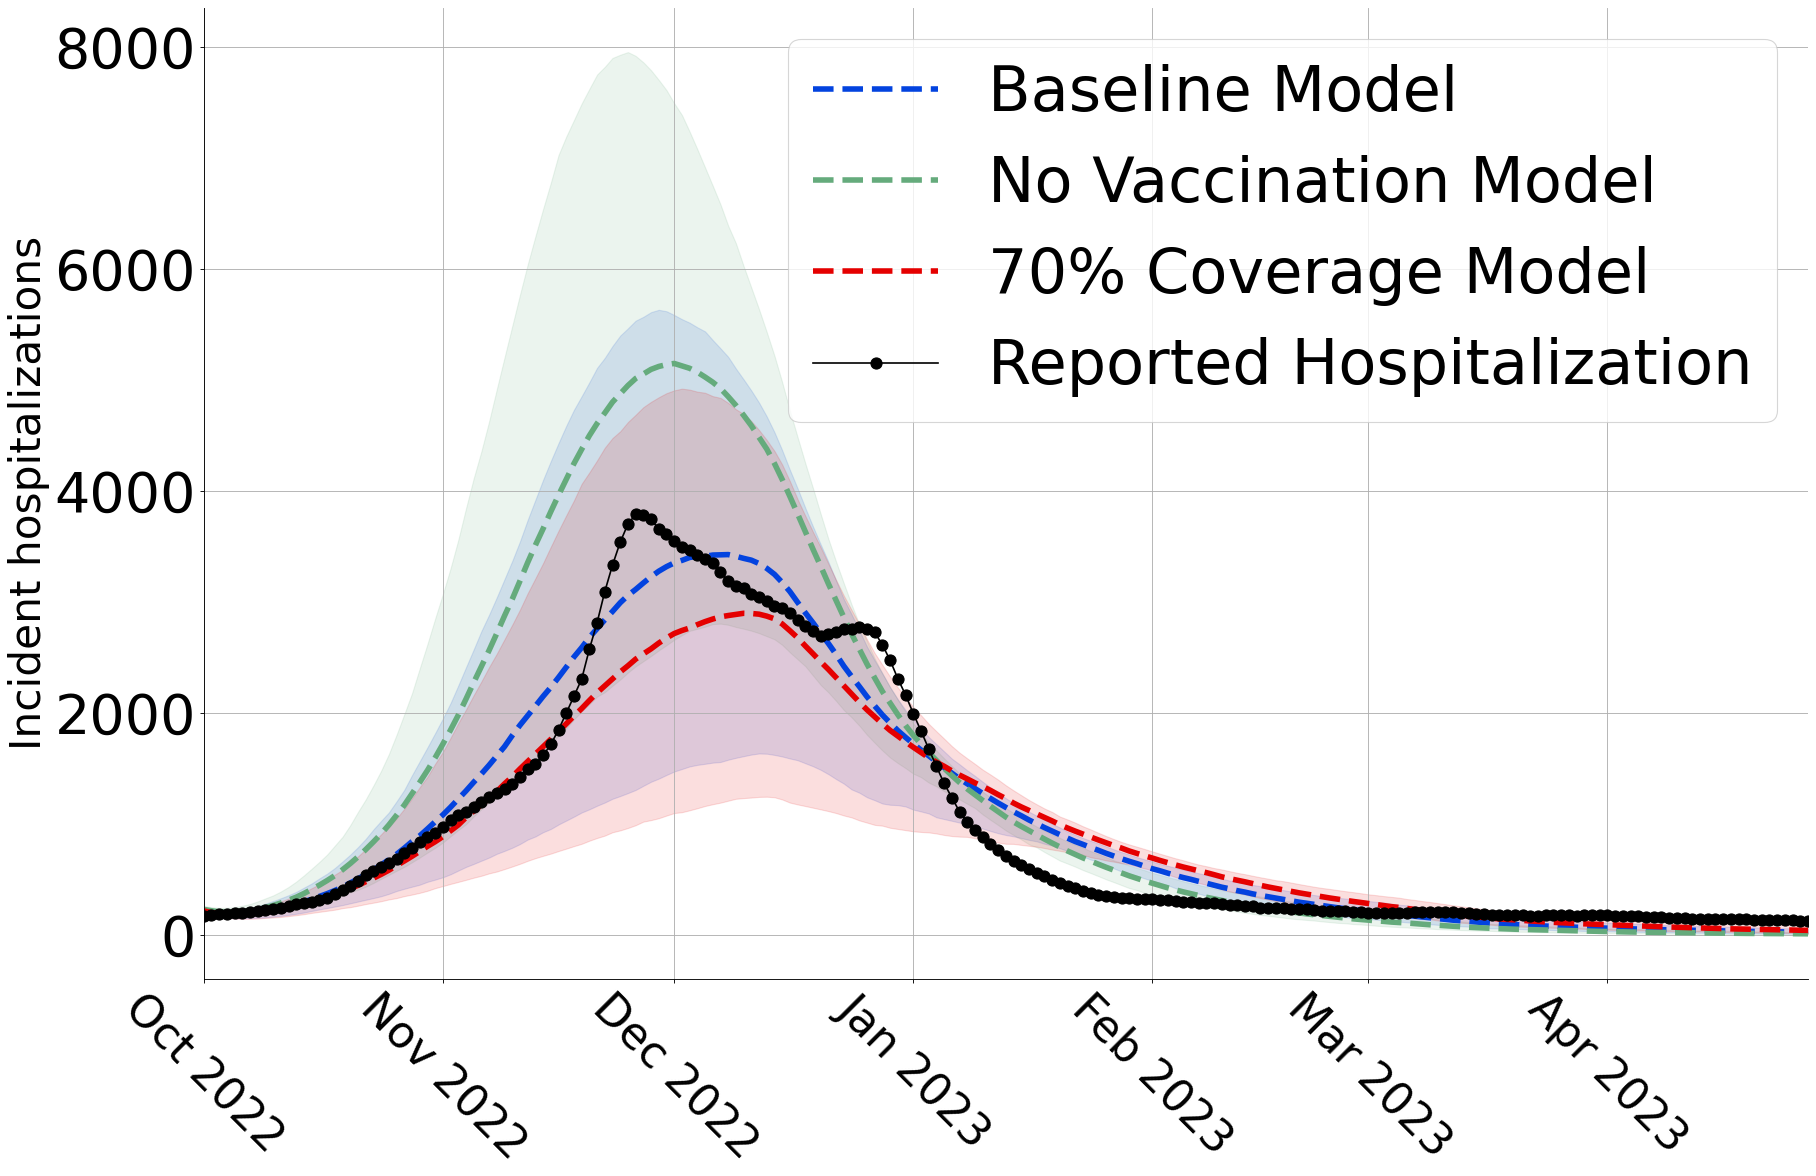

In [193]:
drange1 = pd.date_range("2022-10-01", periods=209, freq="1D") 
drange2 = pd.date_range("2022-08-08", periods=294, freq="1D")
drange3 = pd.date_range("2022-10-01", periods=209, freq="1D") 
#fig, ax = plt.subplots()
fig = plt.figure(num=None, figsize=(24, 16), dpi=80, facecolor='w', edgecolor='k')
plt.rcParams.update({'font.size': 50})

"""

"""

plt.fill_between(drange1, new_hosp_p_A[:,2], new_hosp_p_A[:,22], color='xkcd:blue', alpha=0.13)
plt.plot(drange1, new_hosp_p_A[:,12], '--', color='xkcd:blue', lw=5, label = 'Baseline Model')

plt.fill_between(drange1, new_hosp_p_B[:,2], new_hosp_p_B[:,22], color='xkcd:tea', alpha=0.13)
plt.plot(drange1, new_hosp_p_B[:,12], '--', color='xkcd:tea', lw=5, label = 'No Vaccination Model')


plt.fill_between(drange1, new_hosp_p_C[:,2], new_hosp_p_C[:,22], color='xkcd:red', alpha=0.13)
plt.plot(drange1, new_hosp_p_C[:,12], '--', color='xkcd:red', lw=5, label = '70% Coverage Model')

#plt.fill_between(drange1, new_hosp_p_D[:,2], new_hosp_p_D[:,21], color='xkcd:dark orange', alpha=0.13)
#plt.plot(drange1, new_hosp_p_D[:,12], '--', color='xkcd:dark orange', lw=5, label = 'D: VE against hosp only')



plt.plot(drange3, hosp_avg2, 'k-o', markersize=10,label = 'Reported Hospitalization')

#plt.fill_between(drange1, new_hosp_p_T4[:,2], new_hosp_p_T4[:,21], color='xkcd:green', alpha=0.13)
#plt.plot(drange1, new_hosp_p_T4[:,12], '--', color='xkcd:dark green', lw=5, label = 'E: No vaccination in 2022-23 season')

x_ticks = pd.date_range(start="2022-10-01", end="2024-06-01", freq='MS')  # 2-month frequency
x_tick_labels = [x.strftime("%b %Y") for x in x_ticks]
plt.xticks(x_ticks, x_tick_labels, rotation = -45, fontsize=40) 
#plt.xticks(rotation=90)
#plt.title(state + ' Hospitalization') 
plt.ylabel('Incident hospitalizations', fontsize = 38)
plt.legend(fontsize=56);
plt.autoscale(enable=True, axis='x', tight=True) 
plt.grid() 
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False) #plt.title('High protection')
#plt.axis([18970, 19285, 0, 1e6]) #plt.ylabel('reported deaths')
plt.tight_layout()
#plt.savefig('flufigures/'+state+' Hospitalizations.jpeg')
plt.savefig('Hospitalizations_baseline_target.jpeg')

In [65]:
sum(hosp_avg2)

209972.4285714284

In [194]:
diff=np.zeros([Nsim, ])
for i in range(Nsim):
    diff[i]=(sum(new_hosp_B[:,i])-sum(new_hosp_A[:,i]))
#print(diff)
diff_precentile= np.percentile(diff, [100*0.025, 100*0.5, 100*0.975])
print(diff_precentile)


[49984.85714286 69875.78571429 87453.57142857]


In [195]:
diff=np.zeros([Nsim, ])
for i in range(Nsim):
    diff[i]=(sum(new_hosp_A[:,i]))
#print(diff)
diff_precentile= np.percentile(diff, [100*0.025, 100*0.5, 100*0.975])
print(diff_precentile)


[131167.57142857 219371.14285714 314423.        ]


In [196]:
diff=np.zeros([Nsim, ])
for i in range(Nsim):
    diff[i]=(sum(new_hosp_B[:,i]))
#print(diff)
diff_precentile= np.percentile(diff, [100*0.025, 100*0.5, 100*0.975])
print(diff_precentile)

[182912.57142857 289318.42857143 399928.94285714]


In [170]:
67931+203900

271831

In [70]:
diff=np.zeros([Nsim, ])
for i in range(Nsim):
    diff[i]=-(sum(new_hosp_C[:,i])-sum(new_hosp_A[:,i]))
#print(diff)
diff_precentile= np.percentile(diff, [100*0.025, 100*0.5, 100*0.975])
print(diff_precentile)
result = [(x * 100000) / N for x in diff_precentile]
print(result)

[15798.125      18818.42857143 23859.97857143]
[4.94851833800263, 5.894581722711136, 7.473769292562477]


In [166]:
N17 = data_dem[0]+data_dem[1]+data_dem[2]
N49 = data_dem[3]
N64 = data_dem[4]
N65 = data_dem[5]

In [167]:
### 70% all 
##numbers

diff=np.zeros([Nsim, ])
for i in range(Nsim):
    diff[i]=-(sum(new_hosp_C[:,i])-sum(new_hosp_A[:,i]))
#print(diff)
diff_precentile= np.percentile(diff, [100*0.025, 100*0.5, 100*0.975])
print(diff_precentile)
result = [(x * 100000) / N for x in diff_precentile]
print(result)


diff018=np.zeros([Nsim, ])
for i in range(Nsim):
    diff018[i]=-(sum((new_hosp_0_C[:,i]+new_hosp_1_C[:,i]+new_hosp_2_C[:,i]))-sum((new_hosp_0_A[:,i]+new_hosp_1_A[:,i]+new_hosp_2_A[:,i])))
#print(diff)
diff_precentile018= np.percentile(diff018, [100*0.025, 100*0.5, 100*0.975])
print(diff_precentile018)
result0 = [(x * 100000) / N17 for x in diff_precentile018]
print(result0)

diff1849=np.zeros([Nsim, ])
for i in range(Nsim):
    diff1849[i]=-(sum(new_hosp_3_C[:,i])-sum(new_hosp_3_A[:,i]))
#print(diff)
diff_precentile1849= np.percentile(diff1849, [100*0.025, 100*0.5, 100*0.975])
print(diff_precentile1849)
result1 = [(x * 100000) / N49 for x in diff_precentile1849]
print(result1)

diff4964=np.zeros([Nsim, ])
for i in range(Nsim):
    diff4964[i]=-(sum(new_hosp_4_C[:,i])-sum(new_hosp_4_A[:,i]))
#print(diff)
diff_precentile4964= np.percentile(diff4964, [100*0.025, 100*0.5, 100*0.975])
print(diff_precentile4964)
result2 = [(x * 100000) / N64 for x in diff_precentile4964]
print(result2)

diff65=np.zeros([Nsim, ])
for i in range(Nsim):
    diff65[i]=-(sum(new_hosp_5_C[:,i])-sum(new_hosp_5_A[:,i]))
#print(diff)
diff_precentile65= np.percentile(diff65, [100*0.025, 100*0.5, 100*0.975])
print(diff_precentile65)
result3 = [(x * 100000) / N65 for x in diff_precentile65]
print(result3)

[68138.125 81769.5   92072.25 ]
[21.343213899093364, 25.61303130841821, 28.84020841373019]
[ 9112.23214286 11713.92857143 13613.69285714]
[12.099968453319168, 15.554714142113323, 18.077376818557997]
[10230.17857143 12418.21428571 14852.85714286]
[8.01399544224665, 9.728032799398061, 11.635254322894545]
[12918.625      15360.35714286 17906.32857143]
[20.343173433569316, 24.188209608894763, 28.197393119395336]
[34736.19642857 42554.92857143 48580.28928571]
[65.8078186668601, 80.62042798981638, 92.0354902607677]


In [168]:
### 70% all 
##percentage

diff=np.zeros([Nsim, ])
for i in range(Nsim):
    diff[i]=-(sum(new_hosp_C[:,i])-sum(new_hosp_A[:,i]))/sum(new_hosp_A[:,i])
#print(diff)
diff_precentile= np.percentile(diff, [100*0.025, 100*0.5, 100*0.975])
print(diff_precentile)


diff018=np.zeros([Nsim, ])
for i in range(Nsim):
    diff018[i]=-(sum((new_hosp_0_C[:,i]+new_hosp_1_C[:,i]+new_hosp_2_C[:,i]))-sum((new_hosp_0_A[:,i]+new_hosp_1_A[:,i]+new_hosp_2_A[:,i])))/sum((new_hosp_0_A[:,i]+new_hosp_1_A[:,i]+new_hosp_2_A[:,i]))
#print(diff)
diff_precentile018= np.percentile(diff018, [100*0.025, 100*0.5, 100*0.975])
print(diff_precentile018)


diff1849=np.zeros([Nsim, ])
for i in range(Nsim):
    diff1849[i]=-(sum(new_hosp_3_C[:,i])-sum(new_hosp_3_A[:,i]))/sum(new_hosp_3_A[:,i])
#print(diff)
diff_precentile1849= np.percentile(diff1849, [100*0.025, 100*0.5, 100*0.975])
print(diff_precentile1849)


diff4964=np.zeros([Nsim, ])
for i in range(Nsim):
    diff4964[i]=-(sum(new_hosp_4_C[:,i])-sum(new_hosp_4_A[:,i]))/sum(new_hosp_4_A[:,i])
#print(diff)
diff_precentile4964= np.percentile(diff4964, [100*0.025, 100*0.5, 100*0.975])
print(diff_precentile4964)


diff65=np.zeros([Nsim, ])
for i in range(Nsim):
    diff65[i]=-(sum(new_hosp_5_C[:,i])-sum(new_hosp_5_A[:,i]))/sum(new_hosp_5_A[:,i])
#print(diff)
diff_precentile65= np.percentile(diff65, [100*0.025, 100*0.5, 100*0.975])
print(diff_precentile65)


[0.2765556  0.35161847 0.4949603 ]
[0.24645837 0.33075422 0.48211776]
[0.29725228 0.37930861 0.51026876]
[0.28296474 0.36593087 0.50904724]
[0.26220914 0.3509327  0.49219955]


In [169]:
### impact of none - baseline  
##number


diff=np.zeros([Nsim, ])
for i in range(Nsim):
    diff[i]=(sum(new_hosp_B[:,i])-sum(new_hosp_A[:,i]))
#print(diff)
diff_precentile= np.percentile(diff, [100*0.025, 100*0.5, 100*0.975])
print(diff_precentile)
result = [(x * 100000) / N for x in diff_precentile]
print(result)


diff018=np.zeros([Nsim, ])
for i in range(Nsim):
    diff018[i]=(sum((new_hosp_0_B[:,i]+new_hosp_1_B[:,i]+new_hosp_2_B[:,i]))-sum((new_hosp_0_A[:,i]+new_hosp_1_A[:,i]+new_hosp_2_A[:,i])))
#print(diff)
diff_precentile018= np.percentile(diff018, [100*0.025, 100*0.5, 100*0.975])
print(diff_precentile018)
result0 = [(x * 100000) / N17 for x in diff_precentile018]
print(result0)

diff1849=np.zeros([Nsim, ])
for i in range(Nsim):
    diff1849[i]=(sum(new_hosp_3_B[:,i])-sum(new_hosp_3_A[:,i]))
#print(diff)
diff_precentile1849= np.percentile(diff1849, [100*0.025, 100*0.5, 100*0.975])
print(diff_precentile1849)
result1 = [(x * 100000) / N49 for x in diff_precentile1849]
print(result1)

diff4964=np.zeros([Nsim, ])
for i in range(Nsim):
    diff4964[i]=(sum(new_hosp_4_B[:,i])-sum(new_hosp_4_A[:,i]))
#print(diff)
diff_precentile4964= np.percentile(diff4964, [100*0.025, 100*0.5, 100*0.975])
print(diff_precentile4964)
result2 = [(x * 100000) / N64 for x in diff_precentile4964]
print(result2)

diff65=np.zeros([Nsim, ])
for i in range(Nsim):
    diff65[i]=(sum(new_hosp_5_B[:,i])-sum(new_hosp_5_A[:,i]))
#print(diff)
diff_precentile65= np.percentile(diff65, [100*0.025, 100*0.5, 100*0.975])
print(diff_precentile65)
result3 = [(x * 100000) / N65 for x in diff_precentile65]
print(result3)

[122164.37142857 139148.78571429 151208.62142857]
[38.26610007610712, 43.58620518687755, 47.363762218831745]
[25373.21071429 29321.5        33413.025     ]
[33.69262814961743, 38.93549016769812, 44.368552303277625]
[14544.525      16612.71428571 18727.74285714]
[11.393716761228127, 13.013870250601963, 14.670716141737127]
[22158.53571429 26163.42857143 28503.69285714]
[34.89341435869946, 41.19998568310285, 44.88523873787244]
[56593.22142857 66149.         73839.13928571]
[107.21601201222994, 125.31946052140526, 139.88845032654453]


In [170]:
####percentages
### impact of none - baseline  

diff0=np.zeros([Nsim, ])
for i in range(Nsim):
    diff0[i]=(sum(new_hosp_B[:,i])-sum(new_hosp_A[:,i]))/sum(new_hosp_B[:,i])
#print(diff)
diff_precentile0= np.percentile(diff0, [100*0.025, 100*0.5, 100*0.975])
print(diff_precentile0)

'''
diff=np.zeros([Nsim, ])
for i in range(Nsim):
    diff[i]=(sum(new_hosp_B[:,i])-sum(new_hosp_A[:,i]))
#print(diff)
diff_precentile= np.percentile(diff, [100*0.025, 100*0.5, 100*0.975])
print(diff_precentile)
'''

diff018=np.zeros([Nsim, ])
for i in range(Nsim):
    diff018[i]=(sum((new_hosp_0_B[:,i]+new_hosp_1_B[:,i]+new_hosp_2_B[:,i]))-sum((new_hosp_0_A[:,i]+new_hosp_1_A[:,i]+new_hosp_2_A[:,i])))/sum((new_hosp_0_B[:,i]+new_hosp_1_B[:,i]+new_hosp_2_B[:,i]))
#print(diff)
diff_precentile018= np.percentile(diff018, [100*0.025, 100*0.5, 100*0.975])
print(diff_precentile018)

diff1849=np.zeros([Nsim, ])
for i in range(Nsim):
    diff1849[i]=(sum(new_hosp_3_B[:,i])-sum(new_hosp_3_A[:,i]))/sum(new_hosp_3_B[:,i])
#print(diff)
diff_precentile1849= np.percentile(diff1849, [100*0.025, 100*0.5, 100*0.975])
print(diff_precentile1849)

diff4964=np.zeros([Nsim, ])
for i in range(Nsim):
    diff4964[i]=(sum(new_hosp_4_B[:,i])-sum(new_hosp_4_A[:,i]))/sum(new_hosp_4_B[:,i])
#print(diff)
diff_precentile4964= np.percentile(diff4964, [100*0.025, 100*0.5, 100*0.975])
print(diff_precentile4964)

diff65=np.zeros([Nsim, ])
for i in range(Nsim):
    diff65[i]=(sum(new_hosp_5_B[:,i])-sum(new_hosp_5_A[:,i]))/sum(new_hosp_5_B[:,i])
#print(diff)
diff_precentile65= np.percentile(diff65, [100*0.025, 100*0.5, 100*0.975])
print(diff_precentile65)


[0.31552651 0.37408318 0.46412558]
[0.39610548 0.45438156 0.54474615]
[0.26829296 0.33167702 0.43428785]
[0.31678136 0.38404083 0.47068794]
[0.29397987 0.35359713 0.44267537]


In [79]:
### impact by reducing susceptibility (i.e severity only vaccine (normal(VE_H, VE_I !=0) - VE_I =0)

diff0=np.zeros([Nsim, ])
for i in range(Nsim):
    diff0[i]=(sum(new_hosp_B[:,i])-sum(new_hosp_D[:,i]))
##print(max(diff0)) ### to find out which simualtion percentage maximum
diff_precentile0= np.percentile(diff0, [100*0.025, 100*0.5, 100*0.975])
print(diff_precentile0)
result = [(x * 100000) / N for x in diff_precentile]
print(result)

diff018=np.zeros([Nsim, ])
for i in range(Nsim):
    diff018[i]=(sum((new_hosp_0_B[:,i]+new_hosp_1_B[:,i]+new_hosp_2_B[:,i]))-sum((new_hosp_0_D[:,i]+new_hosp_1_D[:,i]+new_hosp_2_D[:,i])))
#print(diff)
diff_precentile018= np.percentile(diff018, [100*0.025, 100*0.5, 100*0.975])
print(diff_precentile018)
result0 = [(x * 100000) / N17 for x in diff_precentile018]
print(result0)

diff1849=np.zeros([Nsim, ])
for i in range(Nsim):
    diff1849[i]=(sum(new_hosp_3_B[:,i])-sum(new_hosp_3_D[:,i]))
#print(diff)
diff_precentile1849= np.percentile(diff1849, [100*0.025, 100*0.5, 100*0.975])
print(diff_precentile1849)
result1 = [(x * 100000) / N49 for x in diff_precentile1849]
print(result1)

diff4964=np.zeros([Nsim, ])
for i in range(Nsim):
    diff4964[i]=(sum(new_hosp_4_B[:,i])-sum(new_hosp_4_D[:,i]))
#print(diff)
diff_precentile4964= np.percentile(diff4964, [100*0.025, 100*0.5, 100*0.975])
print(diff_precentile4964)
result2 = [(x * 100000) / N64 for x in diff_precentile4964]
print(result2)

diff65=np.zeros([Nsim, ])
for i in range(Nsim):
    diff65[i]=(sum(new_hosp_5_B[:,i])-sum(new_hosp_5_D[:,i]))
#print(diff)
diff_precentile65= np.percentile(diff65, [100*0.025, 100*0.5, 100*0.975])
print(diff_precentile65)
result3 = [(x * 100000) / N65 for x in diff_precentile65]
print(result3)

[33548.70714286 40056.14285714 45798.71071429]
[5.526856684281797, 9.332755848178211, 12.482522631642688]
[6445.075      7555.92857143 9229.96071429]
[8.558298664549092, 10.033381054880754, 12.256298096595064]
[3361.02857143 4834.85714286 6343.08214286]
[2.632922530591581, 3.7874728027704427, 4.968968139483239]
[5660.39285714 7270.57142857 8614.89642857]
[8.913514680935041, 11.449089630868807, 13.56602054465273]
[15962.75714286 20178.85714286 24066.425     ]
[30.24148684903879, 38.22889977295734, 45.59390765814836]


In [80]:
### impact by reducing susceptibility (i.e severity only vaccine (normal(VE_H, VE_I !=0) - VE_I =0)

diff0=np.zeros([Nsim, ])
for i in range(Nsim):
    diff0[i]=(sum(new_hosp_B[:,i])-sum(new_hosp_D[:,i]))/sum(new_hosp_B[:,i])
##print(max(diff0)) ### to find out which simualtion percentage maximum
diff_precentile0= np.percentile(diff0, [100*0.025, 100*0.5, 100*0.975])
print(diff_precentile0)


diff018=np.zeros([Nsim, ])
for i in range(Nsim):
    diff018[i]=(sum((new_hosp_0_B[:,i]+new_hosp_1_B[:,i]+new_hosp_2_B[:,i]))-sum((new_hosp_0_D[:,i]+new_hosp_1_D[:,i]+new_hosp_2_D[:,i])))/sum((new_hosp_0_B[:,i]+new_hosp_1_B[:,i]+new_hosp_2_B[:,i]))
#print(diff)
diff_precentile018= np.percentile(diff018, [100*0.025, 100*0.5, 100*0.975])
print(diff_precentile018)

diff1849=np.zeros([Nsim, ])
for i in range(Nsim):
    diff1849[i]=(sum(new_hosp_3_B[:,i])-sum(new_hosp_3_D[:,i]))/sum(new_hosp_3_B[:,i])
#print(diff)
diff_precentile1849= np.percentile(diff1849, [100*0.025, 100*0.5, 100*0.975])
print(diff_precentile1849)

diff4964=np.zeros([Nsim, ])
for i in range(Nsim):
    diff4964[i]=(sum(new_hosp_4_B[:,i])-sum(new_hosp_4_D[:,i]))/sum(new_hosp_4_B[:,i])
#print(diff)
diff_precentile4964= np.percentile(diff4964, [100*0.025, 100*0.5, 100*0.975])
print(diff_precentile4964)

diff65=np.zeros([Nsim, ])
for i in range(Nsim):
    diff65[i]=(sum(new_hosp_5_B[:,i])-sum(new_hosp_5_D[:,i]))/sum(new_hosp_5_B[:,i])
#print(diff)
diff_precentile65= np.percentile(diff65, [100*0.025, 100*0.5, 100*0.975])
print(diff_precentile65)

[0.1111455  0.13966044 0.1885712 ]
[0.10932048 0.14729321 0.21074837]
[0.07895264 0.12652536 0.18238535]
[0.10002847 0.13923384 0.1792367 ]
[0.11650675 0.14107322 0.1901118 ]


In [77]:
##reduced severity
### impact by reducing severity (i.e sus only vaccine (normal(VE_H, VE_I !=0) - VE_H =0)
##numbers 

diff=np.zeros([Nsim, ])
for i in range(Nsim):
    diff[i]=(sum(new_hosp_D[:,i])-sum(new_hosp_A[:,i]))
#print(diff)
diff_precentile= np.percentile(diff, [100*0.025, 100*0.5, 100*0.975])
print(diff_precentile)
result = [(x * 100000) / N for x in diff_precentile]
print(result)


diff018=np.zeros([Nsim, ])
for i in range(Nsim):
    diff018[i]=(sum((new_hosp_0_D[:,i]+new_hosp_1_D[:,i]+new_hosp_2_D[:,i]))-sum((new_hosp_0_A[:,i]+new_hosp_1_A[:,i]+new_hosp_2_A[:,i])))
#print(diff)
diff_precentile018= np.percentile(diff018, [100*0.025, 100*0.5, 100*0.975])
print(diff_precentile018)
result0 = [(x * 100000) / N17 for x in diff_precentile018]
print(result0)


diff1849=np.zeros([Nsim, ])
for i in range(Nsim):
    diff1849[i]=(sum(new_hosp_3_D[:,i])-sum(new_hosp_3_A[:,i]))
#print(diff)
diff_precentile1849= np.percentile(diff1849, [100*0.025, 100*0.5, 100*0.975])
print(diff_precentile1849)
result1 = [(x * 100000) / N49 for x in diff_precentile1849]
print(result1)

diff4964=np.zeros([Nsim, ])
for i in range(Nsim):
    diff4964[i]=(sum(new_hosp_4_D[:,i])-sum(new_hosp_4_A[:,i]))
#print(diff)
diff_precentile4964= np.percentile(diff4964, [100*0.025, 100*0.5, 100*0.975])
print(diff_precentile4964)
result2 = [(x * 100000) / N64 for x in diff_precentile4964]
print(result2)

diff65=np.zeros([Nsim, ])
for i in range(Nsim):
    diff65[i]=(sum(new_hosp_5_D[:,i])-sum(new_hosp_5_A[:,i]))
#print(diff)
diff_precentile65= np.percentile(diff65, [100*0.025, 100*0.5, 100*0.975])
print(diff_precentile65)
result3 = [(x * 100000) / N65 for x in diff_precentile65]
print(result3)

[17644.46785714 29794.78571429 39850.40357143]
[5.526856684281797, 9.332755848178211, 12.482522631642688]
[3753.77857143 5655.5        7505.775     ]
[4.984574754346615, 7.509836285436171, 9.966783033387001]
[-1370.47857143   238.21428571  1258.31071429]
[-1.0735891801340551, 0.18660946988005575, 0.9857204601862334]
[-748.25357143  269.         1656.32142857]
[-1.178287331342082, 0.42359876949984376, 2.6082368737513555]
[13340.98214286 23086.57142857 32267.88571429]
[25.27452697650087, 43.737572400451356, 61.131597301253635]


In [78]:
### impact by reducing severity (i.e sus only vaccine (normal(VE_H, VE_I !=0) - VE_H =0)

diff0=np.zeros([Nsim, ])
for i in range(Nsim):
    diff0[i]=(sum(new_hosp_D[:,i])-sum(new_hosp_A[:,i]))/sum(new_hosp_D[:,i])
#print(diff)
diff_precentile0= np.percentile(diff0, [100*0.025, 100*0.5, 100*0.975])
print(diff_precentile0)

diff018=np.zeros([Nsim, ])
for i in range(Nsim):
    diff018[i]=(sum((new_hosp_0_D[:,i]+new_hosp_1_D[:,i]+new_hosp_2_D[:,i]))-sum((new_hosp_0_A[:,i]+new_hosp_1_A[:,i]+new_hosp_2_A[:,i])))/sum((new_hosp_0_D[:,i]+new_hosp_1_D[:,i]+new_hosp_2_D[:,i]))
#print(diff)
diff_precentile018= np.percentile(diff018, [100*0.025, 100*0.5, 100*0.975])
print(diff_precentile018)

diff1849=np.zeros([Nsim, ])
for i in range(Nsim):
    diff1849[i]=(sum(new_hosp_3_D[:,i])-sum(new_hosp_3_A[:,i]))/sum(new_hosp_3_D[:,i])
#print(diff)
diff_precentile1849= np.percentile(diff1849, [100*0.025, 100*0.5, 100*0.975])
print(diff_precentile1849)

diff4964=np.zeros([Nsim, ])
for i in range(Nsim):
    diff4964[i]=(sum(new_hosp_4_D[:,i])-sum(new_hosp_4_A[:,i]))/sum(new_hosp_4_D[:,i])
#print(diff)
diff_precentile4964= np.percentile(diff4964, [100*0.025, 100*0.5, 100*0.975])
print(diff_precentile4964)

diff65=np.zeros([Nsim, ])
for i in range(Nsim):
    diff65[i]=(sum(new_hosp_5_D[:,i])-sum(new_hosp_5_A[:,i]))/sum(new_hosp_5_D[:,i])
#print(diff)
diff_precentile65= np.percentile(diff65, [100*0.025, 100*0.5, 100*0.975])
print(diff_precentile65)

[0.10970964 0.12013038 0.13354969]
[0.11003169 0.12895681 0.15348402]
[-0.03080586  0.00669451  0.03881025]
[-0.0155551   0.00606382  0.0366177 ]
[0.17825256 0.19085321 0.20514998]


In [578]:
diff=np.zeros([Nsim, ])
for i in range(Nsim):
    diff[i]=(sum(new_hosp_C[:,i])-sum(new_hosp_A[:,i]))/sum(new_hosp_A[:,i])
#print(diff)
diff_precentile= np.percentile(diff, [100*0.025, 100*0.5, 100*0.975])
print(diff_precentile)

[-0.26904221 -0.08759659 -0.03505778]


In [52]:
diff0=np.zeros([Nsim, ])
for i in range(Nsim):
    diff0[i]=(sum((new_hosp_0_C[:,i]+new_hosp_1_C[:,i]+new_hosp_2_C[:,i]+new_hosp_3_C[:,i]+new_hosp_4_C[:,i]+new_hosp_5_C[:,i]))-sum((new_hosp_0_A[:,i]+new_hosp_1_A[:,i]+new_hosp_2_A[:,i]+new_hosp_3_A[:,i]+new_hosp_4_A[:,i]+new_hosp_5_A[:,i])))/sum((new_hosp_0_A[:,i]+new_hosp_1_A[:,i]+new_hosp_2_A[:,i]+new_hosp_3_A[:,i]+new_hosp_4_A[:,i]+new_hosp_5_A[:,i]))
#print(diff)
diff_precentile0= np.percentile(diff0, [100*0.025, 100*0.5, 100*0.975])
print(diff_precentile0)

[-0.3949045  -0.30602269 -0.24658467]


In [67]:
diff0=np.zeros([Nsim, ])
for i in range(Nsim):
    diff0[i]=(sum(new_hosp_5_C[:,i])-sum(new_hosp_5_A[:,i]))/sum(new_hosp_5_A[:,i])
#print(diff)
diff_precentile0= np.percentile(diff0, [100*0.025, 100*0.5, 100*0.975])
print(diff_precentile0)

[-0.36270663 -0.26675192 -0.20597151]


In [65]:
diff0=np.zeros([Nsim, ])
for i in range(Nsim):
    diff0[i]=((sum(new_hosp_0_C[:,i])-sum(new_hosp_0_A[:,i]))+(sum(new_hosp_1_C[:,i])-sum(new_hosp_1_A[:,i]))+(sum(new_hosp_2_C[:,i])-sum(new_hosp_2_A[:,i])))/sum((new_hosp_0_A[:,i]+new_hosp_1_A[:,i]+new_hosp_2_A[:,i]))
#print(diff)
diff_precentile0= np.percentile(diff0, [100*0.025, 100*0.5, 100*0.975])
print(diff_precentile0)

[-0.36119397 -0.26968832 -0.21275979]


In [197]:
import pandas as pd
import numpy as np

# Assuming new_hosp_A, new_hosp_B, and new_hosp_C are numpy arrays of shape (209, 100)

# Concatenate data along columns for each trajectory
normal_data = np.concatenate([new_hosp_A, new_hosp_B, new_hosp_C], axis=1)

# Create column labels for the DataFrame
columns = []
for traj_type in ['Normal', 'None', 'Target']:
    for i in range(1000):
        columns.append(f"{traj_type}_{i}")

# Create a DataFrame
RETRO = pd.DataFrame(normal_data, columns=columns)

# Now RETRO contains your data in a pandas DataFrame format with 209 rows and 300 columns

RETRO.to_csv('saved_data_burden_FINAL2024NOV/'+state+'.csv', index=False)

In [267]:
import datetime


def calcul_peak_date(case):
    LEN=len(case)
    peaks = np.zeros([25,])
    peak_d = np.zeros([25,])
    
    my_date = datetime.datetime(2022, 8, 8, 0, 0, 0) 

    date_s = np.zeros([25,])
    for j in range(25):
        for i in range(0,LEN):
            peaks[j] = np.max(case[0:LEN,j])

            if (case[i,j] >= peaks[j]):
                peak_d[j] = i


            
    #my_date_l = my_date + datetime.timedelta(days = i)
    #my_date_l = my_date_l.strftime('%m/%d')

    peak_d_p = np.percentile(peak_d, [0, 100*0.01, 100*0.025, 100*0.05, 100*0.1, 100*0.15, 100*0.2, 100*0.25, 100*0.3, 100*0.35, 100*0.4, 100*0.45, 100*0.5, 100*0.55, 100*0.6, 100*0.65, 100*0.7, 100*0.75, 100*0.8, 100*0.85, 100*0.9, 100*0.95, 100*0.975, 100*0.99, 100])
    print(peak_d_p[12])
    my_date_50 = my_date + datetime.timedelta(days = peak_d_p[12])
    my_date_50 = my_date_50.strftime('%m/%d')
    
    my_date_5 = my_date + datetime.timedelta(days = peak_d_p[2])
    my_date_5 = my_date_5.strftime('%m/%d')  
    
    my_date_95 = my_date + datetime.timedelta(days = peak_d_p[21])
    my_date_95 = my_date_95.strftime('%m/%d')      
    
    print(str((my_date_50)) + " [" + str((my_date_5)) + ", " + str((my_date_95)) + "]")


In [268]:
import datetime


def calcul_peak(case):
    LEN=len(case)

    peak_I_d_h = 0
    
    my_date = datetime.datetime(2022, 8, 8, 0, 0, 0) 
 
    my_date_h = datetime.datetime(2022, 8, 8, 0, 0, 0) 


    peak_I_l = np.max(case[0:LEN,2])
    peak_I_m = np.max(case[0:LEN,12])
    peak_I_h = np.max(case[0:LEN,21])
    
    for i in range(0,LEN):
        if (case[i,2] >= peak_I_l):
            peak_I_d_l = i
            my_date_l = my_date + datetime.timedelta(days = i)
            my_date_l = my_date_l.strftime('%m/%d')
        
        if (case[i,12] >= peak_I_m):
            peak_I_d_m = i
            my_date_m = my_date + datetime.timedelta(days = i)
            my_date_m = my_date_m.strftime('%m/%d')
            
        if (case[i,21] >= peak_I_h):
            peak_I_d_h = i
            my_date_h = my_date + datetime.timedelta(days = i)
            my_date_h = my_date_h.strftime('%m/%d')
            
    
    print(str(round(peak_I_m)) + " [" + str(round(peak_I_l)) + ", " + str(round(peak_I_h)) + "]")
    print(str((my_date_m)) + " [" + str((my_date_l)) + ", " + str((my_date_h)) + "]")